### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import glob
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
import seaborn as sns
import scipy as sc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,30)

[nltk_data] Downloading package wordnet to C:\Users\Ashish
[nltk_data]     Lakhmani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ashish
[nltk_data]     Lakhmani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TWITTER SENTIMENT ANALYSIS

In [2]:
df = pd.read_csv('Microsoft_New.csv',encoding='latin-1') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [3]:
df.head()

Date_Time        Date  \
0  2019-03-16 10:52:32  2019-03-16   
1  2019-03-16 10:52:32  2019-03-16   
2  2019-03-16 11:10:11  2019-03-16   
3  2019-03-16 11:10:11  2019-03-16   
4  2019-03-16 12:10:48  2019-03-16   

                                              Tweets  
0  Bingham Osborn &amp; Scarborough Continues to ...  
1  Bingham Osborn &amp; Scarborough Continues to ...  
2  United Services Automobile Association Decreas...  
3  United Services Automobile Association Decreas...  
4  Milestone Group Has Raised Its Microsoft $MSFT...

In [4]:
df = df.drop(["Date_Time"], axis=1)

In [5]:
df.head()

Date                                             Tweets
0  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...
1  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...
2  2019-03-16  United Services Automobile Association Decreas...
3  2019-03-16  United Services Automobile Association Decreas...
4  2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df['Tweet_punct'] = df['Tweets'].apply(lambda x: remove_punct(x))
df.head(20)

Date                                             Tweets  \
0   2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1   2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2   2019-03-16  United Services Automobile Association Decreas...   
3   2019-03-16  United Services Automobile Association Decreas...   
4   2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   
5   2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   
6   2019-03-16  After making new ATHÕs IÕm kinda bummed I exit...   
7   2019-03-16  After making new ATHÕs IÕm kinda bummed I exit...   
8   2019-03-16  How To Buy Low And Sell High: Dividend Strateg...   
9   2019-03-16  How To Buy Low And Sell High: Dividend Strateg...   
10  2019-03-16  As General Dynamics $GD Share Value Declined, ...   
11  2019-03-16  As General Dynamics $GD Share Value Declined, ...   
12  2019-03-16  I hoard Bitcoin, Litecoin, and stocks like you...   
13  2019-03-16  I hoard Bitcoin, Litecoin, and stocks like you...   
14  2019-03-16  @WallStJesus One good week after two skittish ...   
15  2019-03-16  @WallStJesus One good week after two skittish ...   
16  2019-03-16  $GOOGL $MSFT $AMZN $NVDA $FB:\n\nAlphabet, Mic...   
17  2019-03-16  $GOOGL $MSFT $AMZN $NVDA $FB:\n\nAlphabet, Mic...   
18  2019-03-16  With past performance like this, how can you n...   
19  2019-03-16  With past performance like this, how can you n...   

                                          Tweet_punct  
0   Bingham Osborn amp Scarborough Continues to Ho...  
1   Bingham Osborn amp Scarborough Continues to Ho...  
2   United Services Automobile Association Decreas...  
3   United Services Automobile Association Decreas...  
4   Milestone Group Has Raised Its Microsoft MSFT ...  
5   Milestone Group Has Raised Its Microsoft MSFT ...  
6   After making new ATHÕs IÕm kinda bummed I exit...  
7   After making new ATHÕs IÕm kinda bummed I exit...  
8   How To Buy Low And Sell High Dividend Strategy...  
9   How To Buy Low And Sell High Dividend Strategy...  
10  As General Dynamics GD Share Value Declined Lv...  
11  As General Dynamics GD Share Value Declined Lv...  
12  I hoard Bitcoin Litecoin and stocks like you h...  
13  I hoard Bitcoin Litecoin and stocks like you h...  
14  WallStJesus One good week after two skittish w...  
15  WallStJesus One good week after two skittish w...  
16  GOOGL MSFT AMZN NVDA FB\n\nAlphabet Microsoft ...  
17  GOOGL MSFT AMZN NVDA FB\n\nAlphabet Microsoft ...  
18  With past performance like this how can you no...  
19  With past performance like this how can you no...

In [8]:
# removing newline or \n expressions.
df["Tweet_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df["Tweet_punct"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1   2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2   2019-03-16  United Services Automobile Association Decreas...   
3   2019-03-16  United Services Automobile Association Decreas...   
4   2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   
5   2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   
6   2019-03-16  After making new ATHÕs IÕm kinda bummed I exit...   
7   2019-03-16  After making new ATHÕs IÕm kinda bummed I exit...   
8   2019-03-16  How To Buy Low And Sell High: Dividend Strateg...   
9   2019-03-16  How To Buy Low And Sell High: Dividend Strateg...   
10  2019-03-16  As General Dynamics $GD Share Value Declined, ...   
11  2019-03-16  As General Dynamics $GD Share Value Declined, ...   
12  2019-03-16  I hoard Bitcoin, Litecoin, and stocks like you...   
13  2019-03-16  I hoard Bitcoin, Litecoin, and stocks like you...   
14  2019-03-16  @WallStJesus One good week after two skittish ...   
15  2019-03-16  @WallStJesus One good week after two skittish ...   
16  2019-03-16  $GOOGL $MSFT $AMZN $NVDA $FB:\n\nAlphabet, Mic...   
17  2019-03-16  $GOOGL $MSFT $AMZN $NVDA $FB:\n\nAlphabet, Mic...   
18  2019-03-16  With past performance like this, how can you n...   
19  2019-03-16  With past performance like this, how can you n...   

                                          Tweet_punct  \
0   Bingham Osborn amp Scarborough Continues to Ho...   
1   Bingham Osborn amp Scarborough Continues to Ho...   
2   United Services Automobile Association Decreas...   
3   United Services Automobile Association Decreas...   
4   Milestone Group Has Raised Its Microsoft MSFT ...   
5   Milestone Group Has Raised Its Microsoft MSFT ...   
6   After making new ATHÕs IÕm kinda bummed I exit...   
7   After making new ATHÕs IÕm kinda bummed I exit...   
8   How To Buy Low And Sell High Dividend Strategy...   
9   How To Buy Low And Sell High Dividend Strategy...   
10  As General Dynamics GD Share Value Declined Lv...   
11  As General Dynamics GD Share Value Declined Lv...   
12  I hoard Bitcoin Litecoin and stocks like you h...   
13  I hoard Bitcoin Litecoin and stocks like you h...   
14  WallStJesus One good week after two skittish w...   
15  WallStJesus One good week after two skittish w...   
16  GOOGL MSFT AMZN NVDA FB\n\nAlphabet Microsoft ...   
17  GOOGL MSFT AMZN NVDA FB\n\nAlphabet Microsoft ...   
18  With past performance like this how can you no...   
19  With past performance like this how can you no...   

                                      Tweet_nonewline  
0   Bingham Osborn amp Scarborough Continues to Ho...  
1   Bingham Osborn amp Scarborough Continues to Ho...  
2   United Services Automobile Association Decreas...  
3   United Services Automobile Association Decreas...  
4   Milestone Group Has Raised Its Microsoft MSFT ...  
5   Milestone Group Has Raised Its Microsoft MSFT ...  
6   After making new ATHÕs IÕm kinda bummed I exit...  
7   After making new ATHÕs IÕm kinda bummed I exit...  
8   How To Buy Low And Sell High Dividend Strategy...  
9   How To Buy Low And Sell High Dividend Strategy...  
10  As General Dynamics GD Share Value Declined Lv...  
11  As General Dynamics GD Share Value Declined Lv...  
12  I hoard Bitcoin Litecoin and stocks like you h...  
13  I hoard Bitcoin Litecoin and stocks like you h...  
14  WallStJesus One good week after two skittish w...  
15  WallStJesus One good week after two skittish w...  
16  GOOGL MSFT AMZN NVDA FB  Alphabet Microsoft Am...  
17  GOOGL MSFT AMZN NVDA FB  Alphabet Microsoft Am...  
18  With past performance like this how can you no...  
19  With past performance like this how can you no...

In [9]:
# Removing http url from every tweet substitued with space
df["Tweet_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df["Tweet_nonewline"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2  2019-03-16  United Services Automobile Association Decreas...   
3  2019-03-16  United Services Automobile Association Decreas...   
4  2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   

                                         Tweet_punct  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_nonewline  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                        Tweet_wohttp  
0  Bingham Osborn amp Scarborough Continues to Ho...  
1  Bingham Osborn amp Scarborough Continues to Ho...  
2  United Services Automobile Association Decreas...  
3  United Services Automobile Association Decreas...  
4  Milestone Group Has Raised Its Microsoft MSFT ...

In [10]:
# Removing numbers
df["Tweet_nonum"] = [re.sub("\d+", " ", text) for text in df["Tweet_wohttp"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1   2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2   2019-03-16  United Services Automobile Association Decreas...   
3   2019-03-16  United Services Automobile Association Decreas...   
4   2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   
5   2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   
6   2019-03-16  After making new ATHÕs IÕm kinda bummed I exit...   
7   2019-03-16  After making new ATHÕs IÕm kinda bummed I exit...   
8   2019-03-16  How To Buy Low And Sell High: Dividend Strateg...   
9   2019-03-16  How To Buy Low And Sell High: Dividend Strateg...   
10  2019-03-16  As General Dynamics $GD Share Value Declined, ...   
11  2019-03-16  As General Dynamics $GD Share Value Declined, ...   
12  2019-03-16  I hoard Bitcoin, Litecoin, and stocks like you...   
13  2019-03-16  I hoard Bitcoin, Litecoin, and stocks like you...   
14  2019-03-16  @WallStJesus One good week after two skittish ...   
15  2019-03-16  @WallStJesus One good week after two skittish ...   
16  2019-03-16  $GOOGL $MSFT $AMZN $NVDA $FB:\n\nAlphabet, Mic...   
17  2019-03-16  $GOOGL $MSFT $AMZN $NVDA $FB:\n\nAlphabet, Mic...   
18  2019-03-16  With past performance like this, how can you n...   
19  2019-03-16  With past performance like this, how can you n...   

                                          Tweet_punct  \
0   Bingham Osborn amp Scarborough Continues to Ho...   
1   Bingham Osborn amp Scarborough Continues to Ho...   
2   United Services Automobile Association Decreas...   
3   United Services Automobile Association Decreas...   
4   Milestone Group Has Raised Its Microsoft MSFT ...   
5   Milestone Group Has Raised Its Microsoft MSFT ...   
6   After making new ATHÕs IÕm kinda bummed I exit...   
7   After making new ATHÕs IÕm kinda bummed I exit...   
8   How To Buy Low And Sell High Dividend Strategy...   
9   How To Buy Low And Sell High Dividend Strategy...   
10  As General Dynamics GD Share Value Declined Lv...   
11  As General Dynamics GD Share Value Declined Lv...   
12  I hoard Bitcoin Litecoin and stocks like you h...   
13  I hoard Bitcoin Litecoin and stocks like you h...   
14  WallStJesus One good week after two skittish w...   
15  WallStJesus One good week after two skittish w...   
16  GOOGL MSFT AMZN NVDA FB\n\nAlphabet Microsoft ...   
17  GOOGL MSFT AMZN NVDA FB\n\nAlphabet Microsoft ...   
18  With past performance like this how can you no...   
19  With past performance like this how can you no...   

                                      Tweet_nonewline  \
0   Bingham Osborn amp Scarborough Continues to Ho...   
1   Bingham Osborn amp Scarborough Continues to Ho...   
2   United Services Automobile Association Decreas...   
3   United Services Automobile Association Decreas...   
4   Milestone Group Has Raised Its Microsoft MSFT ...   
5   Milestone Group Has Raised Its Microsoft MSFT ...   
6   After making new ATHÕs IÕm kinda bummed I exit...   
7   After making new ATHÕs IÕm kinda bummed I exit...   
8   How To Buy Low And Sell High Dividend Strategy...   
9   How To Buy Low And Sell High Dividend Strategy...   
10  As General Dynamics GD Share Value Declined Lv...   
11  As General Dynamics GD Share Value Declined Lv...   
12  I hoard Bitcoin Litecoin and stocks like you h...   
13  I hoard Bitcoin Litecoin and stocks like you h...   
14  WallStJesus One good week after two skittish w...   
15  WallStJesus One good week after two skittish w...   
16  GOOGL MSFT AMZN NVDA FB  Alphabet Microsoft Am...   
17  GOOGL MSFT AMZN NVDA FB  Alphabet Microsoft Am...   
18  With past performance like this how can you no...   
19  With past performance like this how can you no...   

                                         Tweet_wohttp  \
0   Bingham Osborn amp Scarborough Continues to Ho...   
1   Bingham Osborn amp Scarborough Continues to Ho

In [11]:
#Removing ASCII values
df["Tweet_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df["Tweet_nonum"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2  2019-03-16  United Services Automobile Association Decreas...   
3  2019-03-16  United Services Automobile Association Decreas...   
4  2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   

                                         Tweet_punct  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_nonewline  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                        Tweet_wohttp  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                         Tweet_nonum  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                       Tweet_noascii  
0  Bingham Osborn amp Scarborough Continues to Ho...  
1  Bingham Osborn amp Scarborough Continues to Ho...  
2  United Services Automobile Association Decreas...  
3  United Services Automobile Association Decreas...  
4  Milestone Group Has Raised Its Microsoft MSFT ...

In [12]:
# Applying Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_noascii'].apply(lambda x: tokenization(x.lower()))
df.head()

Date                                             Tweets  \
0  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2  2019-03-16  United Services Automobile Association Decreas...   
3  2019-03-16  United Services Automobile Association Decreas...   
4  2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   

                                         Tweet_punct  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_nonewline  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                        Tweet_wohttp  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                         Tweet_nonum  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                       Tweet_noascii  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_tokenized  
0  [bingham, osborn, amp, scarborough, continues,...  
1  [bingham, osborn, amp, scarborough, continues,...  
2  [united, services, automobile, association, de...  
3  [united, services, automobile, association, de...  
4  [milestone, group, has, raised, its, microsoft...

In [13]:
# Applying Lemmatizer
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_tokenized'].apply(lambda x: lemmatizer(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2  2019-03-16  United Services Automobile Association Decreas...   
3  2019-03-16  United Services Automobile Association Decreas...   
4  2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   

                                         Tweet_punct  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_nonewline  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                        Tweet_wohttp  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                         Tweet_nonum  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                       Tweet_noascii  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_tokenized  \
0  [bingham, osborn, amp, scarborough, continues,...   
1  [bingham, osborn, amp, scarborough, continues,...   
2  [united, services, automobile, association, de...   
3  [united, services, automobile, association, de...   
4  [milestone, group, has, raised, its, microsoft...   

                                    Tweet_lemmatized  
0  [bingham, osborn, amp, scarborough, continue, ...  
1  [bingham, osborn, amp, scarborough, continue, ...  
2  [unite, service, automobile, association, decr...  
3  [unite, service, automobile, association, decr...  
4  [milestone, group, have, raise, its, microsoft...

In [14]:
stopword = nltk.corpus.stopwords.words('english')

In [15]:
# Removing Stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
1  2019-03-16  Bingham Osborn &amp; Scarborough Continues to ...   
2  2019-03-16  United Services Automobile Association Decreas...   
3  2019-03-16  United Services Automobile Association Decreas...   
4  2019-03-16  Milestone Group Has Raised Its Microsoft $MSFT...   

                                         Tweet_punct  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_nonewline  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                        Tweet_wohttp  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                         Tweet_nonum  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                       Tweet_noascii  \
0  Bingham Osborn amp Scarborough Continues to Ho...   
1  Bingham Osborn amp Scarborough Continues to Ho...   
2  United Services Automobile Association Decreas...   
3  United Services Automobile Association Decreas...   
4  Milestone Group Has Raised Its Microsoft MSFT ...   

                                     Tweet_tokenized  \
0  [bingham, osborn, amp, scarborough, continues,...   
1  [bingham, osborn, amp, scarborough, continues,...   
2  [united, services, automobile, association, de...   
3  [united, services, automobile, association, de...   
4  [milestone, group, has, raised, its, microsoft...   

                                    Tweet_lemmatized  \
0  [bingham, osborn, amp, scarborough, continue, ...   
1  [bingham, osborn, amp, scarborough, continue, ...   
2  [unite, service, automobile, association, decr...   
3  [unite, service, automobile, association, decr...   
4  [milestone, group, have, raise, its, microsoft...   

                                       Tweet_nonstop  
0  [bingham, osborn, amp, scarborough, continue, ...  
1  [bingham, osborn, amp, scarborough, continue, ...  
2  [unite, service, automobile, association, decr...  
3  [unite, service, automobile, association, decr...  
4  [milestone, group, raise, microsoft, msft, pos...

In [16]:
#Keeping just Text and Date
Miscrosoft_Data_Tweets = df.drop(["Tweets","Tweet_punct","Tweet_nonewline","Tweet_wohttp","Tweet_nonum","Tweet_noascii","Tweet_tokenized","Tweet_lemmatized"], axis=1)

In [17]:
Miscrosoft_Data_Tweets.head()

Date                                      Tweet_nonstop
0  2019-03-16  [bingham, osborn, amp, scarborough, continue, ...
1  2019-03-16  [bingham, osborn, amp, scarborough, continue, ...
2  2019-03-16  [unite, service, automobile, association, decr...
3  2019-03-16  [unite, service, automobile, association, decr...
4  2019-03-16  [milestone, group, raise, microsoft, msft, pos...

In [18]:
Miscrosoft_Data_Tweets['Year']=[d.split('-')[0] for d in Miscrosoft_Data_Tweets.Date]
Miscrosoft_Data_Tweets['Month']=[d.split('-')[1] for d in Miscrosoft_Data_Tweets.Date]
Miscrosoft_Data_Tweets['Day']=[d.split('-')[2] for d in Miscrosoft_Data_Tweets.Date]

In [19]:
Miscrosoft_Data_Tweets.head()

Date                                      Tweet_nonstop  Year Month  \
0  2019-03-16  [bingham, osborn, amp, scarborough, continue, ...  2019    03   
1  2019-03-16  [bingham, osborn, amp, scarborough, continue, ...  2019    03   
2  2019-03-16  [unite, service, automobile, association, decr...  2019    03   
3  2019-03-16  [unite, service, automobile, association, decr...  2019    03   
4  2019-03-16  [milestone, group, raise, microsoft, msft, pos...  2019    03   

  Day  
0  16  
1  16  
2  16  
3  16  
4  16

In [20]:
Miscrosoft_Data_Tweets = Miscrosoft_Data_Tweets.drop(['Date','Year'],axis=1)

In [21]:
Miscrosoft_Data_Tweets.head()

Tweet_nonstop Month Day
0  [bingham, osborn, amp, scarborough, continue, ...    03  16
1  [bingham, osborn, amp, scarborough, continue, ...    03  16
2  [unite, service, automobile, association, decr...    03  16
3  [unite, service, automobile, association, decr...    03  16
4  [milestone, group, raise, microsoft, msft, pos...    03  16

In [22]:
#Removing redundant Data and Grouping only by Month and Day.
final_dataset_Tweets = pd.DataFrame(data=None, index=None,columns=['Month','Day','Tweet_nonstop'])

In [23]:
final_dataset_Tweets = Miscrosoft_Data_Tweets.groupby(['Month', 'Day'])['Tweet_nonstop'].apply(list).reset_index()

In [24]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  [[bingham, osborn, amp, scarborough, continue,...
1    03  17  [[msft, aapl, amzn, googl, goog, brkb, brka, b...
2    03  18  [[hey, mcfly, look, equal, weight, nasdaq, ndx...
3    03  19  [[blog, post, continue, googl, amzn, msft, ], ...
4    03  20  [[csx, ual, hd, dis, gs, jnj, pg, dwdp, intc, ...

In [25]:
#Converting List to Dictionary
def ltod(a):
    dic={}
    for i in range(len(a)):
        for j in a[i]:
            if j in dic:
                dic[j]+=1
            else:
                dic[j]=1
    return dic

In [26]:
final_dataset_Tweets['Tweet_nonstop']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: ltod(x))

In [27]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  {'bingham': 2, 'osborn': 2, 'amp': 14, 'scarbo...
1    03  17  {'msft': 186, 'aapl': 56, 'amzn': 44, 'googl':...
2    03  18  {'hey': 2, 'mcfly': 2, 'look': 22, 'equal': 2,...
3    03  19  {'blog': 2, 'post': 6, 'continue': 8, 'googl':...
4    03  20  {'csx': 4, 'ual': 4, 'hd': 2, 'dis': 18, 'gs':...

In [28]:
#Calling Positive words List.
with open('positive_words.txt') as f:
    pos_lines = f.read().splitlines()
len(pos_lines)

2005

In [29]:
#Calling Negative words List.
with open('negative_words.txt') as f:
    neg_lines = f.read().splitlines()
len(neg_lines)

4781

In [30]:
#Calculating Positive Scores and Negative Scores
def pos_parity(x):
    pos_count=0
    total = sum(x.values())
    for i in pos_lines:
        if i in x:
            pos_count+=x[i]
    return float(pos_count/total)

In [31]:
def neg_parity(x):
    neg_count=0
    for i in neg_lines:
        if i in x:
            neg_count+=x[i]
    return float(neg_count/(sum(x.values())))

In [32]:
comb_word_tweet={}
len(final_dataset_Tweets.Tweet_nonstop)

31

In [33]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words

In [34]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [35]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['risk', 'rut', 'mar', 'resistance', 'miss', 'kill', 'sap', 'break', 'cloud', 'decline'] [29, 29, 34, 35, 35, 41, 58, 163, 179, 243]


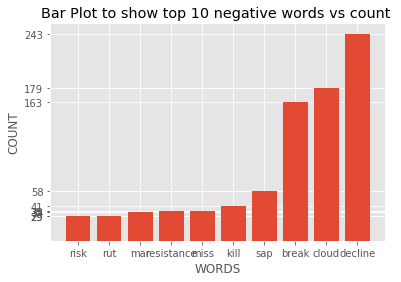

In [36]:
# Plotting the Bar Plot to show top 10 negative words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [37]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [38]:
my_list_names = []
my_list_values = []

for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['good', 'win', 'break', 'cloud', 'free', 'top', 'trust', 'decline', 'like', 'boost'] [106, 145, 163, 179, 186, 197, 233, 243, 258, 260]


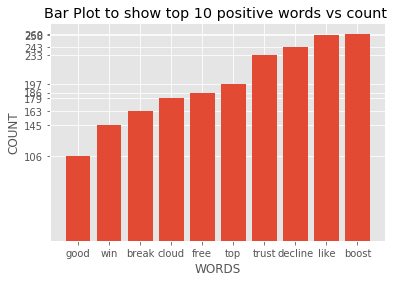

In [39]:
# Plotting the Bar Plot to show top 10 positive words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 positive words vs count ")
plt.show()

In [40]:
#Sentiment Score Generator
final_dataset_Tweets['pos_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: pos_parity(x))

In [41]:
final_dataset_Tweets['neg_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: neg_parity(x))


In [42]:
final_dataset_Tweets

Month Day                                      Tweet_nonstop  \
0     03  16  {'bingham': 2, 'osborn': 2, 'amp': 14, 'scarbo...   
1     03  17  {'msft': 186, 'aapl': 56, 'amzn': 44, 'googl':...   
2     03  18  {'hey': 2, 'mcfly': 2, 'look': 22, 'equal': 2,...   
3     03  19  {'blog': 2, 'post': 6, 'continue': 8, 'googl':...   
4     03  20  {'csx': 4, 'ual': 4, 'hd': 2, 'dis': 18, 'gs':...   
5     03  21  {'googl': 52, 'goog': 28, 'fdx': 6, 'ba': 32, ...   
6     03  22  {'jimcramer': 4, 'nope': 2, 'retail': 4, 'like...   
7     03  23  {'like': 10, 'ctxs': 2, 'msft': 104, 'palace':...   
8     03  24  {'market': 8, 'mayhem': 2, 'come': 12, 'sign':...   
9     03  25  {'': 68, 'mission': 1, 'abort': 1, 'spy': 36, ...   
10    03  26  {'microsoft': 145, 'tech': 8, 'windows': 3, 'v...   
11    03  27  {'todays': 1, 'option': 5, 'order': 1, 'flow':...   
12    03  28  {'': 73, 'pump': 1, 'dump': 1, 'ba': 15, 'aapl...   
13    03  30  {'spx': 4, 'top': 1, 'bottom': 1, 'contributor...   
14    03  31  {'microsoft': 84, 'adobe': 1, 'join': 1, 'forc...   
15    04  01  {'msft': 186, 'turn': 2, 'oafohd': 1, 'eps': 8...   
16    04  02  {'reach': 2, 'ath': 2, 'spx': 12, 'djia': 5, '...   
17    04  03  {'stay': 3, 'ahead': 2, 'nasdaq': 3, 'news': 4...   
18    04  04  {'highest': 3, 'market': 34, 'cap': 5, 'apple'...   
19    04  05  {'verb': 5, 'official': 1, 'verbtechco': 2, 'n...   
20    04  06  {'ah': 2, 'solace': 1, 'success': 2, 'fb': 8, ...   
21    04  07  {'kopin': 2, 'acquire': 1, 'boutique': 1, 'asi...   
22    04  08  {'amzn': 50, 'cvs': 1, 'bhc': 1, 'cy': 1, 'sym...   
23    04  09  {'jimrockfordatsh': 1, 'long': 6, 'time': 2, '...   
24    04  10  {'whats': 1, 'msft': 195, 'wgfarhgqp': 1, 'sho...   
25    04  11  {'stay': 3, 'ahead': 4, 'nasdaq': 7, 'news': 7...   
26    04  12  {'aapl': 49, 'support': 1, 'resistance': 1, 'p...   
27    04  13  {'msft': 109, '': 33, 'highest': 1, 'market': ...   
28    04  14  {'someone': 2, 'clearly': 2, 'know': 3, 'somet...   
29    04  15  {'free': 8, 'video': 1, 'setups': 1, 'apr': 2,...   
30    04  16  {'pr': 3, 'king': 2, 'art': 1, 'game': 7, 'cho...   

    pos_parity_tweets  neg_parity_tweets  
0            0.028103           0.029274  
1            0.031393           0.019977  
2            0.030474           0.020316  
3            0.035200           0.019124  
4            0.035859           0.016194  
5            0.040287           0.021861  
6            0.031228           0.028452  
7            0.033797           0.014911  
8            0.026959           0.018534  
9            0.033995           0.015743  
10           0.026321           0.018830  
11           0.026750           0.019394  
12           0.025367           0.014885  
13           0.031325           0.026506  
14           0.023123           0.015653  
15           0.026553           0.026553  
16           0.031420           0.014282  
17           0.029429           0.018857  
18           0.033858           0.021522  
19           0.030311           0.013849  
20           0.030225           0.013817  
21           0.020535           0.013068  
22           0.033197           0.019918  
23           0.027894           0.020982  
24           0.030658           0.022575  
25           0.029361           0.020009  
26           0.027140           0.016006  
27           0.026484           0.011872  
28           0.025825           0.013391  
29           0.025055           0.017143  
30           0.020894           0.013031

In [43]:
new_df_Tweets = final_dataset_Tweets.drop(["Tweet_nonstop","Month","Day"], axis=1)
final_dataset_Tweets['Day'] = final_dataset_Tweets['Day'].astype(int)
final_dataset_Tweets['Month'] = final_dataset_Tweets['Month'].astype(int)
new_df_Tweets

pos_parity_tweets  neg_parity_tweets
0            0.028103           0.029274
1            0.031393           0.019977
2            0.030474           0.020316
3            0.035200           0.019124
4            0.035859           0.016194
5            0.040287           0.021861
6            0.031228           0.028452
7            0.033797           0.014911
8            0.026959           0.018534
9            0.033995           0.015743
10           0.026321           0.018830
11           0.026750           0.019394
12           0.025367           0.014885
13           0.031325           0.026506
14           0.023123           0.015653
15           0.026553           0.026553
16           0.031420           0.014282
17           0.029429           0.018857
18           0.033858           0.021522
19           0.030311           0.013849
20           0.030225           0.013817
21           0.020535           0.013068
22           0.033197           0.019918
23           0.027894           0.020982
24           0.030658           0.022575
25           0.029361           0.020009
26           0.027140           0.016006
27           0.026484           0.011872
28           0.025825           0.013391
29           0.025055           0.017143
30           0.020894           0.013031

In [44]:
#def mmdd_feature(x,y):
#    s=x+x/y
#    return float(s)

In [45]:
#Adding Date Feature that notifies each month and day discreetly
new_df_Tweets['date_feature']= (final_dataset_Tweets['Month']+final_dataset_Tweets['Day'])/final_dataset_Tweets['Month']

In [46]:
new_df_Tweets

pos_parity_tweets  neg_parity_tweets  date_feature
0            0.028103           0.029274      6.333333
1            0.031393           0.019977      6.666667
2            0.030474           0.020316      7.000000
3            0.035200           0.019124      7.333333
4            0.035859           0.016194      7.666667
5            0.040287           0.021861      8.000000
6            0.031228           0.028452      8.333333
7            0.033797           0.014911      8.666667
8            0.026959           0.018534      9.000000
9            0.033995           0.015743      9.333333
10           0.026321           0.018830      9.666667
11           0.026750           0.019394     10.000000
12           0.025367           0.014885     10.333333
13           0.031325           0.026506     11.000000
14           0.023123           0.015653     11.333333
15           0.026553           0.026553      1.250000
16           0.031420           0.014282      1.500000
17           0.029429           0.018857      1.750000
18           0.033858           0.021522      2.000000
19           0.030311           0.013849      2.250000
20           0.030225           0.013817      2.500000
21           0.020535           0.013068      2.750000
22           0.033197           0.019918      3.000000
23           0.027894           0.020982      3.250000
24           0.030658           0.022575      3.500000
25           0.029361           0.020009      3.750000
26           0.027140           0.016006      4.000000
27           0.026484           0.011872      4.250000
28           0.025825           0.013391      4.500000
29           0.025055           0.017143      4.750000
30           0.020894           0.013031      5.000000

### NEWS SENTIMENT ANALYSIS

In [47]:
#Loading News Data
df1 = pd.read_csv('MSFT.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [48]:
df1.head()

Date                                               MSFT
0  4/16/19  eu unfair practices digital rules put spotligh...
1  4/16/19  safrican technology group eoh soars on turnaro...
2  4/16/19  microsoft turned down facialrecognition sales ...
3  4/16/19  xbox to partner with eleague for gears of war ...
4  4/16/19             better buy microsoft vs salesforcecom

In [49]:
# Following the same data cleaning process for the scrapped news data as done for the tweets

In [50]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df1['MSFT_punct'] = df1['MSFT'].apply(lambda x: remove_punct(x))
df1.head(10)

Date                                               MSFT  \
0  4/16/19  eu unfair practices digital rules put spotligh...   
1  4/16/19  safrican technology group eoh soars on turnaro...   
2  4/16/19  microsoft turned down facialrecognition sales ...   
3  4/16/19  xbox to partner with eleague for gears of war ...   
4  4/16/19             better buy microsoft vs salesforcecom    
5  4/16/19  ubers wordy risk factors mix tedium and terror...   
6  4/16/19  will alphabets big bet on google cloud be enough    
7  4/16/19  is microsoft gunning for apple airpods with su...   
8  4/16/19  will walmarts alliance with kidbox better its ...   
9  4/16/19  microsoft to launch surface buds should aapl a...   

                                          MSFT_punct  
0  eu unfair practices digital rules put spotligh...  
1  safrican technology group eoh soars on turnaro...  
2  microsoft turned down facialrecognition sales ...  
3  xbox to partner with eleague for gears of war ...  
4             better buy microsoft vs salesforcecom   
5   ubers wordy risk factors mix tedium and terror    
6  will alphabets big bet on google cloud be enough   
7  is microsoft gunning for apple airpods with su...  
8  will walmarts alliance with kidbox better its ...  
9  microsoft to launch surface buds should aapl a...

In [52]:
# removing newline or \n expressions.
df1["MSFT_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df1["MSFT_punct"]]
df1.head(20)

Date                                               MSFT  \
0   4/16/19  eu unfair practices digital rules put spotligh...   
1   4/16/19  safrican technology group eoh soars on turnaro...   
2   4/16/19  microsoft turned down facialrecognition sales ...   
3   4/16/19  xbox to partner with eleague for gears of war ...   
4   4/16/19             better buy microsoft vs salesforcecom    
5   4/16/19  ubers wordy risk factors mix tedium and terror...   
6   4/16/19  will alphabets big bet on google cloud be enough    
7   4/16/19  is microsoft gunning for apple airpods with su...   
8   4/16/19  will walmarts alliance with kidbox better its ...   
9   4/16/19  microsoft to launch surface buds should aapl a...   
10  4/16/19  technology sector update for 04162019 ibm amba...   
11  4/16/19  amazon to crunch data for chilean stargazers a...   
12  4/16/19  3 stocks poised for huge growth over the next ...   
13  4/16/19        4 reasons google stadia is no game changer    
14  4/15/19  microsoft latest tech giant to build airpods r...   
15  4/15/19  microsoft msft gains as market dips what you s...   
16  4/15/19   ibm stock wont rise as fast as investors expect    
17  4/15/19  microsoft pud ink deal for clean energy amp br...   
18  4/15/19  technology sector update for 04152019 phun lyf...   
19  4/15/19  ibms blockchain service adopted by albertsons ...   

                                           MSFT_punct  \
0   eu unfair practices digital rules put spotligh...   
1   safrican technology group eoh soars on turnaro...   
2   microsoft turned down facialrecognition sales ...   
3   xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom    
5    ubers wordy risk factors mix tedium and terror     
6   will alphabets big bet on google cloud be enough    
7   is microsoft gunning for apple airpods with su...   
8   will walmarts alliance with kidbox better its ...   
9   microsoft to launch surface buds should aapl a...   
10  technology sector update for   ibm amba logi m...   
11  amazon to crunch data for chilean stargazers a...   
12    stocks poised for huge growth over the next ...   
13          reasons google stadia is no game changer    
14  microsoft latest tech giant to build airpods r...   
15  microsoft msft gains as market dips what you s...   
16   ibm stock wont rise as fast as investors expect    
17  microsoft pud ink deal for clean energy amp br...   
18  technology sector update for   phun lyft saic ...   
19  ibms blockchain service adopted by albertsons ...   

                                       MSFT_nonewline  
0   eu unfair practices digital rules put spotligh...  
1   safrican technology group eoh soars on turnaro...  
2   microsoft turned down facialrecognition sales ...  
3   xbox to partner with eleague for gears of war ...  
4               better buy microsoft vs salesforcecom  
5      ubers wordy risk factors mix tedium and terror  
6    will alphabets big bet on google cloud be enough  
7   is microsoft gunning for apple airpods with su...  
8   will walmarts alliance with kidbox better its ...  
9   microsoft to launch surface buds should aapl a...  
10  technology sector update for   ibm amba logi m...  
11  amazon to crunch data for chilean stargazers a...  
12  stocks poised for huge growth over the next de...  
13           reasons google stadia is no game changer  
14  microsoft latest tech giant to build airpods r...  
15  microsoft msft gains as market dips what you s...  
16    ibm stock wont rise as fast as investors expect  
17  microsoft pud ink deal for clean energy amp br...  
18  technology sector update for   phun lyft saic ...  
19  ibms blockchain service adopted by albertsons ...

In [53]:
#Removing http url from every tweet substitued with space
df1["MSFT_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df1["MSFT_nonewline"]]
df1.head()

Date                                               MSFT  \
0  4/16/19  eu unfair practices digital rules put spotligh...   
1  4/16/19  safrican technology group eoh soars on turnaro...   
2  4/16/19  microsoft turned down facialrecognition sales ...   
3  4/16/19  xbox to partner with eleague for gears of war ...   
4  4/16/19             better buy microsoft vs salesforcecom    

                                          MSFT_punct  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4             better buy microsoft vs salesforcecom    

                                      MSFT_nonewline  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                         MSFT_wohttp  
0  eu unfair practices digital rules put spotligh...  
1  safrican technology group eoh soars on turnaro...  
2  microsoft turned down facialrecognition sales ...  
3  xbox to partner with eleague for gears of war ...  
4              better buy microsoft vs salesforcecom

In [54]:
# Removing numbers
df1["MSFT_nonum"] = [re.sub("\d+", " ", text) for text in df1["MSFT_wohttp"]]
df1.head(20)

Date                                               MSFT  \
0   4/16/19  eu unfair practices digital rules put spotligh...   
1   4/16/19  safrican technology group eoh soars on turnaro...   
2   4/16/19  microsoft turned down facialrecognition sales ...   
3   4/16/19  xbox to partner with eleague for gears of war ...   
4   4/16/19             better buy microsoft vs salesforcecom    
5   4/16/19  ubers wordy risk factors mix tedium and terror...   
6   4/16/19  will alphabets big bet on google cloud be enough    
7   4/16/19  is microsoft gunning for apple airpods with su...   
8   4/16/19  will walmarts alliance with kidbox better its ...   
9   4/16/19  microsoft to launch surface buds should aapl a...   
10  4/16/19  technology sector update for 04162019 ibm amba...   
11  4/16/19  amazon to crunch data for chilean stargazers a...   
12  4/16/19  3 stocks poised for huge growth over the next ...   
13  4/16/19        4 reasons google stadia is no game changer    
14  4/15/19  microsoft latest tech giant to build airpods r...   
15  4/15/19  microsoft msft gains as market dips what you s...   
16  4/15/19   ibm stock wont rise as fast as investors expect    
17  4/15/19  microsoft pud ink deal for clean energy amp br...   
18  4/15/19  technology sector update for 04152019 phun lyf...   
19  4/15/19  ibms blockchain service adopted by albertsons ...   

                                           MSFT_punct  \
0   eu unfair practices digital rules put spotligh...   
1   safrican technology group eoh soars on turnaro...   
2   microsoft turned down facialrecognition sales ...   
3   xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom    
5    ubers wordy risk factors mix tedium and terror     
6   will alphabets big bet on google cloud be enough    
7   is microsoft gunning for apple airpods with su...   
8   will walmarts alliance with kidbox better its ...   
9   microsoft to launch surface buds should aapl a...   
10  technology sector update for   ibm amba logi m...   
11  amazon to crunch data for chilean stargazers a...   
12    stocks poised for huge growth over the next ...   
13          reasons google stadia is no game changer    
14  microsoft latest tech giant to build airpods r...   
15  microsoft msft gains as market dips what you s...   
16   ibm stock wont rise as fast as investors expect    
17  microsoft pud ink deal for clean energy amp br...   
18  technology sector update for   phun lyft saic ...   
19  ibms blockchain service adopted by albertsons ...   

                                       MSFT_nonewline  \
0   eu unfair practices digital rules put spotligh...   
1   safrican technology group eoh soars on turnaro...   
2   microsoft turned down facialrecognition sales ...   
3   xbox to partner with eleague for gears of war ...   
4               better buy microsoft vs salesforcecom   
5      ubers wordy risk factors mix tedium and terror   
6    will alphabets big bet on google cloud be enough   
7   is microsoft gunning for apple airpods with su...   
8   will walmarts alliance with kidbox better its ...   
9   microsoft to launch surface buds should aapl a...   
10  technology sector update for   ibm amba logi m...   
11  amazon to crunch data for chilean stargazers a...   
12  stocks poised for huge growth over the next de...   
13           reasons google stadia is no game changer   
14  microsoft latest tech giant to build airpods r...   
15  microsoft msft gains as market dips what you s...   
16    ibm stock wont rise as fast as investors expect   
17  microsoft pud ink deal for clean energy amp br...   
18  technology sector update for   phun lyft saic ...   
19  ibms blockchain service adopted by albertsons ...   

                                          MSFT_wohttp  \
0   eu unfair practices digital rules put spotligh...   
1   safrican technology group eoh soars on turnaro...   
2   microsoft turned down facialrecognition sales ...

In [55]:
#Removing ASCII Values
df1["MSFT_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df1["MSFT_nonum"]]
df1.head()

Date                                               MSFT  \
0  4/16/19  eu unfair practices digital rules put spotligh...   
1  4/16/19  safrican technology group eoh soars on turnaro...   
2  4/16/19  microsoft turned down facialrecognition sales ...   
3  4/16/19  xbox to partner with eleague for gears of war ...   
4  4/16/19             better buy microsoft vs salesforcecom    

                                          MSFT_punct  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4             better buy microsoft vs salesforcecom    

                                      MSFT_nonewline  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                         MSFT_wohttp  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                          MSFT_nonum  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                        MSFT_noascii  
0  eu unfair practices digital rules put spotligh...  
1  safrican technology group eoh soars on turnaro...  
2  microsoft turned down facialrecognition sales ...  
3  xbox to partner with eleague for gears of war ...  
4              better buy microsoft vs salesforcecom

In [56]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['MSFT_tokenized'] = df1['MSFT_noascii'].apply(lambda x: tokenization(x.lower()))
df1.head()

Date                                               MSFT  \
0  4/16/19  eu unfair practices digital rules put spotligh...   
1  4/16/19  safrican technology group eoh soars on turnaro...   
2  4/16/19  microsoft turned down facialrecognition sales ...   
3  4/16/19  xbox to partner with eleague for gears of war ...   
4  4/16/19             better buy microsoft vs salesforcecom    

                                          MSFT_punct  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4             better buy microsoft vs salesforcecom    

                                      MSFT_nonewline  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                         MSFT_wohttp  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                          MSFT_nonum  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                        MSFT_noascii  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                      MSFT_tokenized  
0  [eu, unfair, practices, digital, rules, put, s...  
1  [safrican, technology, group, eoh, soars, on, ...  
2  [microsoft, turned, down, facialrecognition, s...  
3  [xbox, to, partner, with, eleague, for, gears,...  
4        [better, buy, microsoft, vs, salesforcecom]

In [57]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df1['MSFT_lemmatized'] = df1['MSFT_tokenized'].apply(lambda x: lemmatizer(x))
df1.head()

Date                                               MSFT  \
0  4/16/19  eu unfair practices digital rules put spotligh...   
1  4/16/19  safrican technology group eoh soars on turnaro...   
2  4/16/19  microsoft turned down facialrecognition sales ...   
3  4/16/19  xbox to partner with eleague for gears of war ...   
4  4/16/19             better buy microsoft vs salesforcecom    

                                          MSFT_punct  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4             better buy microsoft vs salesforcecom    

                                      MSFT_nonewline  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                         MSFT_wohttp  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                          MSFT_nonum  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                        MSFT_noascii  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                      MSFT_tokenized  \
0  [eu, unfair, practices, digital, rules, put, s...   
1  [safrican, technology, group, eoh, soars, on, ...   
2  [microsoft, turned, down, facialrecognition, s...   
3  [xbox, to, partner, with, eleague, for, gears,...   
4        [better, buy, microsoft, vs, salesforcecom]   

                                     MSFT_lemmatized  
0  [eu, unfair, practice, digital, rule, put, spo...  
1  [safrican, technology, group, eoh, soar, on, t...  
2  [microsoft, turn, down, facialrecognition, sal...  
3  [xbox, to, partner, with, eleague, for, gear, ...  
4        [better, buy, microsoft, vs, salesforcecom]

In [58]:
stopword = nltk.corpus.stopwords.words('english')

In [59]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df1['MSFT_nonstop'] = df1['MSFT_lemmatized'].apply(lambda x: remove_stopwords(x))
df1.head()

Date                                               MSFT  \
0  4/16/19  eu unfair practices digital rules put spotligh...   
1  4/16/19  safrican technology group eoh soars on turnaro...   
2  4/16/19  microsoft turned down facialrecognition sales ...   
3  4/16/19  xbox to partner with eleague for gears of war ...   
4  4/16/19             better buy microsoft vs salesforcecom    

                                          MSFT_punct  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4             better buy microsoft vs salesforcecom    

                                      MSFT_nonewline  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                         MSFT_wohttp  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                          MSFT_nonum  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                        MSFT_noascii  \
0  eu unfair practices digital rules put spotligh...   
1  safrican technology group eoh soars on turnaro...   
2  microsoft turned down facialrecognition sales ...   
3  xbox to partner with eleague for gears of war ...   
4              better buy microsoft vs salesforcecom   

                                      MSFT_tokenized  \
0  [eu, unfair, practices, digital, rules, put, s...   
1  [safrican, technology, group, eoh, soars, on, ...   
2  [microsoft, turned, down, facialrecognition, s...   
3  [xbox, to, partner, with, eleague, for, gears,...   
4        [better, buy, microsoft, vs, salesforcecom]   

                                     MSFT_lemmatized  \
0  [eu, unfair, practice, digital, rule, put, spo...   
1  [safrican, technology, group, eoh, soar, on, t...   
2  [microsoft, turn, down, facialrecognition, sal...   
3  [xbox, to, partner, with, eleague, for, gear, ...   
4        [better, buy, microsoft, vs, salesforcecom]   

                                        MSFT_nonstop  
0  [eu, unfair, practice, digital, rule, put, spo...  
1  [safrican, technology, group, eoh, soar, turna...  
2  [microsoft, turn, facialrecognition, sales, hu...  
3        [xbox, partner, eleague, gear, war, series]  
4        [better, buy, microsoft, vs, salesforcecom]

In [60]:
Microsoft_Data_News = df1.drop(["MSFT","MSFT_punct","MSFT_nonewline","MSFT_wohttp","MSFT_nonum","MSFT_noascii","MSFT_tokenized","MSFT_lemmatized"], axis=1)

In [61]:
Microsoft_Data_News.head()
print(type(Microsoft_Data_News.Date))

<class 'pandas.core.series.Series'>


In [62]:
Microsoft_Data_News['Month']=[d.split('/')[0] for d in Microsoft_Data_News.Date]
Microsoft_Data_News['Day']=[d.split('/')[1] for d in Microsoft_Data_News.Date]
Microsoft_Data_News['Year']=[d.split('/')[2] for d in Microsoft_Data_News.Date]

In [63]:
Microsoft_Data_News.head()

Date                                       MSFT_nonstop Month Day Year
0  4/16/19  [eu, unfair, practice, digital, rule, put, spo...     4  16   19
1  4/16/19  [safrican, technology, group, eoh, soar, turna...     4  16   19
2  4/16/19  [microsoft, turn, facialrecognition, sales, hu...     4  16   19
3  4/16/19        [xbox, partner, eleague, gear, war, series]     4  16   19
4  4/16/19        [better, buy, microsoft, vs, salesforcecom]     4  16   19

In [64]:
Microsoft_Data_News = Microsoft_Data_News.drop(['Date','Year'],axis=1)


In [65]:
Microsoft_Data_News.head(50)

MSFT_nonstop Month Day
0   [eu, unfair, practice, digital, rule, put, spo...     4  16
1   [safrican, technology, group, eoh, soar, turna...     4  16
2   [microsoft, turn, facialrecognition, sales, hu...     4  16
3         [xbox, partner, eleague, gear, war, series]     4  16
4         [better, buy, microsoft, vs, salesforcecom]     4  16
5   [ubers, wordy, risk, factor, mix, tedium, terror]     4  16
6        [alphabets, big, bet, google, cloud, enough]     4  16
7      [microsoft, gun, apple, airpods, surface, bud]     4  16
8   [walmarts, alliance, kidbox, better, online, g...     4  16
9   [microsoft, launch, surface, bud, aapl, amp, o...     4  16
10  [technology, sector, update, ibm, amba, logi, ...     4  16
11  [amazon, crunch, data, chilean, stargazers, am...     4  16
12         [stock, poise, huge, growth, next, decade]     4  16
13            [reason, google, stadia, game, changer]     4  16
14  [microsoft, latest, tech, giant, build, airpod...     4  15
15         [microsoft, msft, gain, market, dip, know]     4  15
16  [ibm, stock, wont, rise, fast, investors, expect]     4  15
17  [microsoft, pud, ink, deal, clean, energy, amp...     4  15
18  [technology, sector, update, phun, lyft, saic,...     4  15
19  [ibms, blockchain, service, adopt, albertsons,...     4  15
20           [ways, ai, drive, growth, amazon, stock]     4  15
21  [investors, target, emerge, startups, blocksho...     4  14
22  [warren, buffett, satya, nadella, mentor, hubs...     4  14
23              [inside, softbanks, push, rule, road]     4  13
24            [big, data, help, fight, deforestation]     4  12
25  [notable, friday, option, activity, msft, rcl,...     4  12
26                                   [time, buy, spy]     4  12
27   [ishares, russell, top, etf, iwl, invest, radar]     4  12
28                          [expect, ibms, q, result]     4  12
29  [microsoft, amp, amazon, stay, jedi, race, ibm...     4  12
30      [logitechs, unit, ante, game, new, solutions]     4  12
31        [forward, guidance, make, break, jnj, earn]     4  12
32  [technology, sector, update, infy, camp, sabr,...     4  12
33              [inside, softbanks, push, rule, road]     4  11
34    [yeti, hold, godaddy, pluralsight, jump, today]     4  11
35  [technology, sector, update, gogoipsmsftgddykt...     4  11
36                  [microsoft, earn, mark, calendar]     4  11
37                 [semiconductor, stock, buy, right]     4  11
38  [technology, sector, update, psmsftgddyktccamz...     4  11
39                           [internet, stock, watch]     4  11
40              [buy, sony, stock, speculative, play]     4  11
41  [google, ante, amzn, msft, amp, ibm, open, sou...     4  11
42  [technology, sector, update, leds, phun, inpx,...     4  11
43  [fidelity, high, dividend, etf, fdvv, strong, ...     4  11
44                   [bear, day, turtle, beach, hear]     4  11
45  [square, sq, open, new, office, expand, presen...     4  11
46  [amazon, microsoft, choose, compete, pentagon,...     4  10
47     [growth, story, amazon, stock, remain, intact]     4  10
48  [ishares, us, technology, etf, experience, big...     4  10
49                     [spy, etho, big, etf, inflows]     4  10

In [66]:
final_dataset_News = pd.DataFrame(data=None, index=None,columns=['Month','Day','MSFT_nonstop'])

In [67]:
final_dataset_News = Microsoft_Data_News.groupby(['Month','Day'])['MSFT_nonstop'].apply(list).reset_index()

In [68]:
final_dataset_News

Month Day                                       MSFT_nonstop
0      3  16        [[battle, dividends, apple, vs, microsoft]]
1      3  17  [[sony, buy, take, two, interactive, wouldnt, ...
2      3  18  [[mondays, etf, unusual, volume, pfm], [micros...
3      3  19  [[better, buy, apple, vs, microsoft], [hours, ...
4      3  20  [[microsoft, msft, stock, move, know], [sony, ...
5      3  21  [[google, stadia, could, long, await, netflix,...
6      3  22  [[hours, active, mar, aeg, ms, qqq, elan, lly,...
7      3  23                [[hard, believe, starbucks, facts]]
8      3  24  [[telecom, equipment, provider, avaya, conside...
9      3  25  [[nintendo, reportedly, work, two, new, switch...
10     3  26  [[microsoft, msft, gain, lag, market, know], [...
11     3  27  [[uber, lyft, hot, ipos, amp, etfs, need, know...
12     3  28  [[cloudera, cldr, announce, two, edge, data, m...
13     3  29  [[hours, active, mar, fold, qqq, xog, aaba, vx...
14     3  30  [[microsoft, adobe, join, force, win, market, ...
15     3  31  [[must, cloud, stock, next, years], [billionai...
16     4   1  [[microsoft, msft, gain, lag, market, know], [...
17     4  10  [[amazon, microsoft, choose, compete, pentagon...
18     4  11  [[inside, softbanks, push, rule, road], [yeti,...
19     4  12  [[big, data, help, fight, deforestation], [not...
20     4  13            [[inside, softbanks, push, rule, road]]
21     4  14  [[investors, target, emerge, startups, blocksh...
22     4  15  [[microsoft, latest, tech, giant, build, airpo...
23     4  16  [[eu, unfair, practice, digital, rule, put, sp...
24     4   2  [[new, chapter, begin, blackberry, turnaround,...
25     4   3  [[tech, stock, raise, dividends], [hours, acti...
26     4   4  [[noteworthy, thursday, option, activity, okta...
27     4   5  [[ishares, msci, acwi, low, carbon, target, et...
28     4   6  [[us, stockssp, post, day, win, streak, job, d...
29     4   7  [[microsoft, could, evolve, shopifys, newest, ...
30     4   8  [[intels, chip, issue, hurt, tech, giants], [m...
31     4   9  [[qualcomm, aim, take, nvidia, intel, new, ai,...

In [69]:
#### APPLIED LIST TO DICT USING THE FUNCTION ABOVE

In [70]:
final_dataset_News['MSFT_nonstop']=final_dataset_News['MSFT_nonstop'].apply(lambda x: ltod(x))

In [71]:
final_dataset_News

Month Day                                       MSFT_nonstop
0      3  16  {'battle': 1, 'dividends': 1, 'apple': 1, 'vs'...
1      3  17  {'sony': 1, 'buy': 1, 'take': 1, 'two': 1, 'in...
2      3  18  {'mondays': 2, 'etf': 1, 'unusual': 1, 'volume...
3      3  19  {'better': 1, 'buy': 2, 'apple': 1, 'vs': 1, '...
4      3  20  {'microsoft': 2, 'msft': 2, 'stock': 5, 'move'...
5      3  21  {'google': 1, 'stadia': 1, 'could': 1, 'long':...
6      3  22  {'hours': 1, 'active': 1, 'mar': 3, 'aeg': 1, ...
7      3  23  {'hard': 1, 'believe': 1, 'starbucks': 1, 'fac...
8      3  24  {'telecom': 1, 'equipment': 1, 'provider': 1, ...
9      3  25  {'nintendo': 1, 'reportedly': 1, 'work': 1, 't...
10     3  26  {'microsoft': 2, 'msft': 3, 'gain': 1, 'lag': ...
11     3  27  {'uber': 1, 'lyft': 1, 'hot': 1, 'ipos': 1, 'a...
12     3  28  {'cloudera': 2, 'cldr': 1, 'announce': 1, 'two...
13     3  29  {'hours': 1, 'active': 1, 'mar': 1, 'fold': 1,...
14     3  30  {'microsoft': 1, 'adobe': 1, 'join': 1, 'force...
15     3  31  {'must': 1, 'cloud': 1, 'stock': 2, 'next': 1,...
16     4   1  {'microsoft': 3, 'msft': 3, 'gain': 1, 'lag': ...
17     4  10  {'amazon': 2, 'microsoft': 2, 'choose': 1, 'co...
18     4  11  {'inside': 1, 'softbanks': 1, 'push': 1, 'rule...
19     4  12  {'big': 1, 'data': 1, 'help': 1, 'fight': 1, '...
20     4  13  {'inside': 1, 'softbanks': 1, 'push': 1, 'rule...
21     4  14  {'investors': 1, 'target': 1, 'emerge': 1, 'st...
22     4  15  {'microsoft': 3, 'latest': 1, 'tech': 1, 'gian...
23     4  16  {'eu': 1, 'unfair': 1, 'practice': 1, 'digital...
24     4   2  {'new': 1, 'chapter': 1, 'begin': 1, 'blackber...
25     4   3  {'tech': 1, 'stock': 5, 'raise': 1, 'dividends...
26     4   4  {'noteworthy': 1, 'thursday': 1, 'option': 1, ...
27     4   5  {'ishares': 1, 'msci': 1, 'acwi': 1, 'low': 1,...
28     4   6  {'us': 2, 'stockssp': 1, 'post': 2, 'day': 2, ...
29     4   7  {'microsoft': 1, 'could': 1, 'evolve': 1, 'sho...
30     4   8  {'intels': 1, 'chip': 1, 'issue': 1, 'hurt': 1...
31     4   9  {'qualcomm': 1, 'aim': 1, 'take': 1, 'nvidia':...

In [72]:
comb_word_news={}
len(final_dataset_News.MSFT_nonstop)

32

In [73]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words for news
for x in final_dataset_News.MSFT_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [74]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['limit', 'threat', 'issue', 'fear', 'lag', 'concern', 'sap', 'worry', 'mar', 'cloud'] [1, 2, 2, 3, 3, 3, 4, 4, 6, 13]


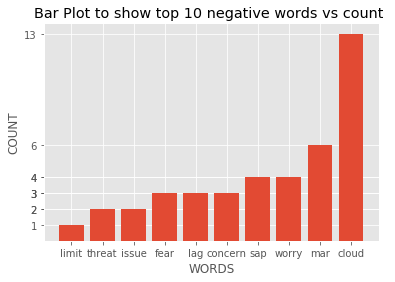

In [75]:
# Plotting the Bar Plot to show top 10 negative words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [76]:
comb_word_news={}

In [77]:
for x in final_dataset_News.MSFT_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [78]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['better', 'noteworthy', 'bolster', 'win', 'top', 'boost', 'best', 'right', 'optimism', 'gain'] [3, 3, 3, 4, 4, 4, 5, 6, 6, 8]


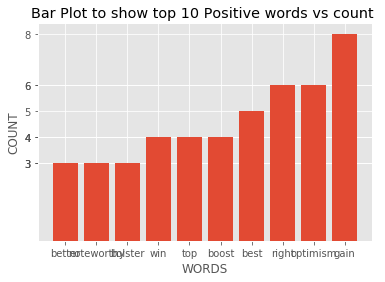

In [79]:
# Plotting the Bar Plot to show top 10 positive words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 Positive words vs count ")
plt.show()

In [80]:
#### USING POSITIVE LISt AND NEGATIVE LIST

In [81]:
final_dataset_News['pos_parity_news']=final_dataset_News['MSFT_nonstop'].apply(lambda x: pos_parity(x))

In [82]:
final_dataset_News['neg_parity_news']=final_dataset_News['MSFT_nonstop'].apply(lambda x: neg_parity(x))

In [83]:
final_dataset_News

Month Day                                       MSFT_nonstop  \
0      3  16  {'battle': 1, 'dividends': 1, 'apple': 1, 'vs'...   
1      3  17  {'sony': 1, 'buy': 1, 'take': 1, 'two': 1, 'in...   
2      3  18  {'mondays': 2, 'etf': 1, 'unusual': 1, 'volume...   
3      3  19  {'better': 1, 'buy': 2, 'apple': 1, 'vs': 1, '...   
4      3  20  {'microsoft': 2, 'msft': 2, 'stock': 5, 'move'...   
5      3  21  {'google': 1, 'stadia': 1, 'could': 1, 'long':...   
6      3  22  {'hours': 1, 'active': 1, 'mar': 3, 'aeg': 1, ...   
7      3  23  {'hard': 1, 'believe': 1, 'starbucks': 1, 'fac...   
8      3  24  {'telecom': 1, 'equipment': 1, 'provider': 1, ...   
9      3  25  {'nintendo': 1, 'reportedly': 1, 'work': 1, 't...   
10     3  26  {'microsoft': 2, 'msft': 3, 'gain': 1, 'lag': ...   
11     3  27  {'uber': 1, 'lyft': 1, 'hot': 1, 'ipos': 1, 'a...   
12     3  28  {'cloudera': 2, 'cldr': 1, 'announce': 1, 'two...   
13     3  29  {'hours': 1, 'active': 1, 'mar': 1, 'fold': 1,...   
14     3  30  {'microsoft': 1, 'adobe': 1, 'join': 1, 'force...   
15     3  31  {'must': 1, 'cloud': 1, 'stock': 2, 'next': 1,...   
16     4   1  {'microsoft': 3, 'msft': 3, 'gain': 1, 'lag': ...   
17     4  10  {'amazon': 2, 'microsoft': 2, 'choose': 1, 'co...   
18     4  11  {'inside': 1, 'softbanks': 1, 'push': 1, 'rule...   
19     4  12  {'big': 1, 'data': 1, 'help': 1, 'fight': 1, '...   
20     4  13  {'inside': 1, 'softbanks': 1, 'push': 1, 'rule...   
21     4  14  {'investors': 1, 'target': 1, 'emerge': 1, 'st...   
22     4  15  {'microsoft': 3, 'latest': 1, 'tech': 1, 'gian...   
23     4  16  {'eu': 1, 'unfair': 1, 'practice': 1, 'digital...   
24     4   2  {'new': 1, 'chapter': 1, 'begin': 1, 'blackber...   
25     4   3  {'tech': 1, 'stock': 5, 'raise': 1, 'dividends...   
26     4   4  {'noteworthy': 1, 'thursday': 1, 'option': 1, ...   
27     4   5  {'ishares': 1, 'msci': 1, 'acwi': 1, 'low': 1,...   
28     4   6  {'us': 2, 'stockssp': 1, 'post': 2, 'day': 2, ...   
29     4   7  {'microsoft': 1, 'could': 1, 'evolve': 1, 'sho...   
30     4   8  {'intels': 1, 'chip': 1, 'issue': 1, 'hurt': 1...   
31     4   9  {'qualcomm': 1, 'aim': 1, 'take': 1, 'nvidia':...   

    pos_parity_news  neg_parity_news  
0          0.000000         0.000000  
1          0.000000         0.000000  
2          0.033333         0.016667  
3          0.051282         0.042735  
4          0.044444         0.033333  
5          0.000000         0.000000  
6          0.022222         0.066667  
7          0.000000         0.250000  
8          0.062500         0.062500  
9          0.034884         0.034884  
10         0.068966         0.034483  
11         0.053763         0.043011  
12         0.060606         0.060606  
13         0.040000         0.080000  
14         0.066667         0.066667  
15         0.000000         0.076923  
16         0.073171         0.024390  
17         0.032787         0.032787  
18         0.052632         0.000000  
19         0.033898         0.033898  
20         0.000000         0.000000  
21         0.000000         0.000000  
22         0.057692         0.019231  
23         0.051546         0.051546  
24         0.014493         0.028986  
25         0.000000         0.017241  
26         0.051095         0.014599  
27         0.087379         0.009709  
28         0.052632         0.105263  
29         0.000000         0.000000  
30         0.025000         0.058333  
31         0.026316         0.043860

In [84]:
new_df_News= final_dataset_News.drop(["MSFT_nonstop","Month","Day"], axis=1)
final_dataset_News['Day'] = final_dataset_News['Day'].astype(int)
final_dataset_News['Month'] = final_dataset_News['Month'].astype(int)
new_df_News

pos_parity_news  neg_parity_news
0          0.000000         0.000000
1          0.000000         0.000000
2          0.033333         0.016667
3          0.051282         0.042735
4          0.044444         0.033333
5          0.000000         0.000000
6          0.022222         0.066667
7          0.000000         0.250000
8          0.062500         0.062500
9          0.034884         0.034884
10         0.068966         0.034483
11         0.053763         0.043011
12         0.060606         0.060606
13         0.040000         0.080000
14         0.066667         0.066667
15         0.000000         0.076923
16         0.073171         0.024390
17         0.032787         0.032787
18         0.052632         0.000000
19         0.033898         0.033898
20         0.000000         0.000000
21         0.000000         0.000000
22         0.057692         0.019231
23         0.051546         0.051546
24         0.014493         0.028986
25         0.000000         0.017241
26         0.051095         0.014599
27         0.087379         0.009709
28         0.052632         0.105263
29         0.000000         0.000000
30         0.025000         0.058333
31         0.026316         0.043860

### GETTING STOCKS DATA

In [85]:
df2 = pd.read_csv('Microsoft_Stock.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [86]:
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  117.250000  114.589996  115.339996  115.910004  54681100   
1   3/16/2019  117.250000  114.589996  115.339996  115.910004  54681100   
2   3/17/2019  117.250000  114.589996  115.339996  115.910004  54681100   
3   3/18/2019  117.610001  116.050003  116.169998  117.570000  31207600   
4   3/19/2019  118.440002  116.989998  118.089996  117.650001  37588700   
5   3/20/2019  118.750000  116.709999  117.389999  117.519997  28113300   
6   3/21/2019  120.820000  117.089996  117.139999  120.220001  29854400   
7   3/22/2019  119.589996  117.040001  119.500000  117.050003  33624500   
8   3/23/2019  119.589996  117.040001  119.500000  117.050003  33624500   
9   3/24/2019  119.589996  117.040001  119.500000  117.050003  33624500   
10  3/25/2019  118.010002  116.320000  116.559998  117.660004  27067100   
11  3/26/2019  118.709999  116.849999  118.620003  117.910004  26097700   
12  3/27/2019  118.209999  115.519997  117.879997  116.769997  22733400   
13  3/28/2019  117.580002  116.129997  117.440002  116.930000  18334800   
14  3/29/2019  118.320000  116.959999  118.070000  117.940002  25399800   
15  3/30/2019  118.320000  116.959999  118.070000  117.940002  25399800   
16  3/31/2019  118.320000  116.959999  118.070000  117.940002  25399800   
17   4/1/2019  119.110001  118.099999  118.949997  119.019997  22789100   
18   4/2/2019  119.480003  118.519997  119.059998  119.190002  18142300   
19   4/3/2019  120.430000  119.150001  119.860001  119.970001  22860700   
20   4/4/2019  120.230003  118.379997  120.099999  119.360001  20112800   
21   4/5/2019  120.230003  119.370003  119.389999  119.889999  15826200   
22   4/6/2019  120.230003  119.370003  119.389999  119.889999  15826200   
23   4/7/2019  120.230003  119.370003  119.389999  119.889999  15826200   
24   4/8/2019  120.019997  118.639999  119.809998  119.930000  15116200   
25   4/9/2019  119.540001  118.580002  118.629997  119.279999  17612000   
26  4/10/2019  120.349999  119.540001  119.760002  120.190002  16477200   
27  4/11/2019  120.849999  119.919998  120.540001  120.330002  14209100   
28  4/12/2019  120.980003  120.370003  120.639999  120.949997  19745100   
29  4/13/2019  120.980003  120.370003  120.639999  120.949997  19745100   
30  4/14/2019  120.980003  120.370003  120.639999  120.949997  19745100   
31  4/15/2019  121.580002  120.570000  120.940002  121.050003  15792600   
32  4/16/2019  121.650001  120.099999  121.639999  120.769997  14071800   

     Adj Close  
0   115.910004  
1   115.910004  
2   115.910004  
3   117.570000  
4   117.650001  
5   117.519997  
6   120.220001  
7   117.050003  
8   117.050003  
9   117.050003  
10  117.660004  
11  117.910004  
12  116.769997  
13  116.930000  
14  117.940002  
15  117.940002  
16  117.940002  
17  119.019997  
18  119.190002  
19  119.970001  
20  119.360001  
21  119.889999  
22  119.889999  
23  119.889999  
24  119.930000  
25  119.279999  
26  120.190002  
27  120.330002  
28  120.949997  
29  120.949997  
30  120.949997  
31  121.050003  
32  120.769997

In [87]:
Vol=df2[['Volume']]

In [88]:
#Calculating normalized value for Volume of Stocks using preprocessing.
min_max_scaler=preprocessing.MinMaxScaler()
vol_scaled=min_max_scaler.fit_transform(Vol)

In [89]:
Vol_normalized=pd.DataFrame(vol_scaled,columns=["Volume_norm"])
df2["Vol_normalized"]=Vol_normalized
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  117.250000  114.589996  115.339996  115.910004  54681100   
1   3/16/2019  117.250000  114.589996  115.339996  115.910004  54681100   
2   3/17/2019  117.250000  114.589996  115.339996  115.910004  54681100   
3   3/18/2019  117.610001  116.050003  116.169998  117.570000  31207600   
4   3/19/2019  118.440002  116.989998  118.089996  117.650001  37588700   
5   3/20/2019  118.750000  116.709999  117.389999  117.519997  28113300   
6   3/21/2019  120.820000  117.089996  117.139999  120.220001  29854400   
7   3/22/2019  119.589996  117.040001  119.500000  117.050003  33624500   
8   3/23/2019  119.589996  117.040001  119.500000  117.050003  33624500   
9   3/24/2019  119.589996  117.040001  119.500000  117.050003  33624500   
10  3/25/2019  118.010002  116.320000  116.559998  117.660004  27067100   
11  3/26/2019  118.709999  116.849999  118.620003  117.910004  26097700   
12  3/27/2019  118.209999  115.519997  117.879997  116.769997  22733400   
13  3/28/2019  117.580002  116.129997  117.440002  116.930000  18334800   
14  3/29/2019  118.320000  116.959999  118.070000  117.940002  25399800   
15  3/30/2019  118.320000  116.959999  118.070000  117.940002  25399800   
16  3/31/2019  118.320000  116.959999  118.070000  117.940002  25399800   
17   4/1/2019  119.110001  118.099999  118.949997  119.019997  22789100   
18   4/2/2019  119.480003  118.519997  119.059998  119.190002  18142300   
19   4/3/2019  120.430000  119.150001  119.860001  119.970001  22860700   
20   4/4/2019  120.230003  118.379997  120.099999  119.360001  20112800   
21   4/5/2019  120.230003  119.370003  119.389999  119.889999  15826200   
22   4/6/2019  120.230003  119.370003  119.389999  119.889999  15826200   
23   4/7/2019  120.230003  119.370003  119.389999  119.889999  15826200   
24   4/8/2019  120.019997  118.639999  119.809998  119.930000  15116200   
25   4/9/2019  119.540001  118.580002  118.629997  119.279999  17612000   
26  4/10/2019  120.349999  119.540001  119.760002  120.190002  16477200   
27  4/11/2019  120.849999  119.919998  120.540001  120.330002  14209100   
28  4/12/2019  120.980003  120.370003  120.639999  120.949997  19745100   
29  4/13/2019  120.980003  120.370003  120.639999  120.949997  19745100   
30  4/14/2019  120.980003  120.370003  120.639999  120.949997  19745100   
31  4/15/2019  121.580002  120.570000  120.940002  121.050003  15792600   
32  4/16/2019  121.650001  120.099999  121.639999  120.769997  14071800   

     Adj Close  Vol_normalized  
0   115.910004        1.000000  
1   115.910004        1.000000  
2   115.910004        1.000000  
3   117.570000        0.421967  
4   117.650001        0.579101  
5   117.519997        0.345771  
6   120.220001        0.388645  
7   117.050003        0.481483  
8   117.050003        0.481483  
9   117.050003        0.481483  
10  117.660004        0.320008  
11  117.910004        0.296137  
12  116.769997        0.213291  
13  116.930000        0.104976  
14  117.940002        0.278951  
15  117.940002        0.278951  
16  117.940002        0.278951  
17  119.019997        0.214663  
18  119.190002        0.100236  
19  119.970001        0.216426  
20  119.360001        0.148759  
21  119.889999        0.043202  
22  119.889999        0.043202  
23  119.889999        0.043202  
24  119.930000        0.025718  
25  119.279999        0.087177  
26  120.190002        0.059233  
27  120.330002        0.003381  
28  120.949997        0.139704  
29  120.949997        0.139704  
30  120.949997        0.139704  
31  121.050003        0.042375  
32  120.769997        0.000000

In [90]:
df2['daily_return']= (df2['Close']-df2['Open'])/df2['Open']
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  117.250000  114.589996  115.339996  115.910004  54681100   
1   3/16/2019  117.250000  114.589996  115.339996  115.910004  54681100   
2   3/17/2019  117.250000  114.589996  115.339996  115.910004  54681100   
3   3/18/2019  117.610001  116.050003  116.169998  117.570000  31207600   
4   3/19/2019  118.440002  116.989998  118.089996  117.650001  37588700   
5   3/20/2019  118.750000  116.709999  117.389999  117.519997  28113300   
6   3/21/2019  120.820000  117.089996  117.139999  120.220001  29854400   
7   3/22/2019  119.589996  117.040001  119.500000  117.050003  33624500   
8   3/23/2019  119.589996  117.040001  119.500000  117.050003  33624500   
9   3/24/2019  119.589996  117.040001  119.500000  117.050003  33624500   
10  3/25/2019  118.010002  116.320000  116.559998  117.660004  27067100   
11  3/26/2019  118.709999  116.849999  118.620003  117.910004  26097700   
12  3/27/2019  118.209999  115.519997  117.879997  116.769997  22733400   
13  3/28/2019  117.580002  116.129997  117.440002  116.930000  18334800   
14  3/29/2019  118.320000  116.959999  118.070000  117.940002  25399800   
15  3/30/2019  118.320000  116.959999  118.070000  117.940002  25399800   
16  3/31/2019  118.320000  116.959999  118.070000  117.940002  25399800   
17   4/1/2019  119.110001  118.099999  118.949997  119.019997  22789100   
18   4/2/2019  119.480003  118.519997  119.059998  119.190002  18142300   
19   4/3/2019  120.430000  119.150001  119.860001  119.970001  22860700   
20   4/4/2019  120.230003  118.379997  120.099999  119.360001  20112800   
21   4/5/2019  120.230003  119.370003  119.389999  119.889999  15826200   
22   4/6/2019  120.230003  119.370003  119.389999  119.889999  15826200   
23   4/7/2019  120.230003  119.370003  119.389999  119.889999  15826200   
24   4/8/2019  120.019997  118.639999  119.809998  119.930000  15116200   
25   4/9/2019  119.540001  118.580002  118.629997  119.279999  17612000   
26  4/10/2019  120.349999  119.540001  119.760002  120.190002  16477200   
27  4/11/2019  120.849999  119.919998  120.540001  120.330002  14209100   
28  4/12/2019  120.980003  120.370003  120.639999  120.949997  19745100   
29  4/13/2019  120.980003  120.370003  120.639999  120.949997  19745100   
30  4/14/2019  120.980003  120.370003  120.639999  120.949997  19745100   
31  4/15/2019  121.580002  120.570000  120.940002  121.050003  15792600   
32  4/16/2019  121.650001  120.099999  121.639999  120.769997  14071800   

     Adj Close  Vol_normalized  daily_return  
0   115.910004        1.000000      0.004942  
1   115.910004        1.000000      0.004942  
2   115.910004        1.000000      0.004942  
3   117.570000        0.421967      0.012051  
4   117.650001        0.579101     -0.003726  
5   117.519997        0.345771      0.001107  
6   120.220001        0.388645      0.026293  
7   117.050003        0.481483     -0.020502  
8   117.050003        0.481483     -0.020502  
9   117.050003        0.481483     -0.020502  
10  117.660004        0.320008      0.009437  
11  117.910004        0.296137     -0.005985  
12  116.769997        0.213291     -0.009416  
13  116.930000        0.104976     -0.004343  
14  117.940002        0.278951     -0.001101  
15  117.940002        0.278951     -0.001101  
16  117.940002        0.278951     -0.001101  
17  119.019997        0.214663      0.000588  
18  119.190002        0.100236      0.001092  
19  119.970001        0.216426      0.000918  
20  119.360001        0.148759     -0.006162  
21  119.889999        0.043202      0.004188  
22  119.889999        0.043202      0.004188  
23  119.889999        0.043202      0.004188  
24  119.930000        0.025718      0.001002  
25  119.279999        0.087177      0.005479  
26  120.190002        0.059233      0.003591  
27  120.330002        0.003381     -0.001742  
28  120.949997        0.139704      0.002570  
29  120.949997        0.139704      0.002570  
3

In [91]:
Microsoft_Data_Stock=df2
print(type(Microsoft_Data_Stock.Date))
print(type(df2.Date))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [92]:
Microsoft_Data_Stock['Month']=[d.split('/')[0] for d in Microsoft_Data_Stock.Date]
Microsoft_Data_Stock['Day']=[d.split('/')[1] for d in Microsoft_Data_Stock.Date]
Microsoft_Data_Stock['Year']=[d.split('/')[2] for d in Microsoft_Data_Stock.Date]

33
33


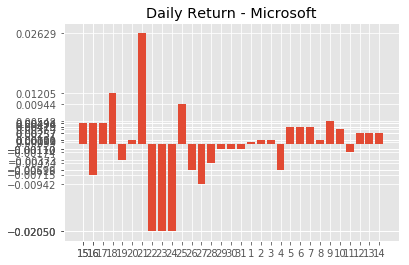

In [93]:
#Plotting Daily Return

daily_return_list=[]
for x in Microsoft_Data_Stock.daily_return:
    daily_return_list.append(x)
print(len(daily_return_list))
day_list=[]
for x in Microsoft_Data_Stock.Day:
    day_list.append(x)
print(len(day_list))
#plt.hist(daily_return_list)
y=day_list
plt.bar(y, height=daily_return_list)
plt.title("Daily Return - Microsoft")
plt.xticks(day_list,day_list)
plt.yticks(daily_return_list)
plt.figure.figsize=(50,20)

plt.show()

In [94]:
Microsoft_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  117.250000  114.589996  115.339996  115.910004  54681100   
1   3/16/2019  117.250000  114.589996  115.339996  115.910004  54681100   
2   3/17/2019  117.250000  114.589996  115.339996  115.910004  54681100   
3   3/18/2019  117.610001  116.050003  116.169998  117.570000  31207600   
4   3/19/2019  118.440002  116.989998  118.089996  117.650001  37588700   
5   3/20/2019  118.750000  116.709999  117.389999  117.519997  28113300   
6   3/21/2019  120.820000  117.089996  117.139999  120.220001  29854400   
7   3/22/2019  119.589996  117.040001  119.500000  117.050003  33624500   
8   3/23/2019  119.589996  117.040001  119.500000  117.050003  33624500   
9   3/24/2019  119.589996  117.040001  119.500000  117.050003  33624500   
10  3/25/2019  118.010002  116.320000  116.559998  117.660004  27067100   
11  3/26/2019  118.709999  116.849999  118.620003  117.910004  26097700   
12  3/27/2019  118.209999  115.519997  117.879997  116.769997  22733400   
13  3/28/2019  117.580002  116.129997  117.440002  116.930000  18334800   
14  3/29/2019  118.320000  116.959999  118.070000  117.940002  25399800   
15  3/30/2019  118.320000  116.959999  118.070000  117.940002  25399800   
16  3/31/2019  118.320000  116.959999  118.070000  117.940002  25399800   
17   4/1/2019  119.110001  118.099999  118.949997  119.019997  22789100   
18   4/2/2019  119.480003  118.519997  119.059998  119.190002  18142300   
19   4/3/2019  120.430000  119.150001  119.860001  119.970001  22860700   
20   4/4/2019  120.230003  118.379997  120.099999  119.360001  20112800   
21   4/5/2019  120.230003  119.370003  119.389999  119.889999  15826200   
22   4/6/2019  120.230003  119.370003  119.389999  119.889999  15826200   
23   4/7/2019  120.230003  119.370003  119.389999  119.889999  15826200   
24   4/8/2019  120.019997  118.639999  119.809998  119.930000  15116200   
25   4/9/2019  119.540001  118.580002  118.629997  119.279999  17612000   
26  4/10/2019  120.349999  119.540001  119.760002  120.190002  16477200   
27  4/11/2019  120.849999  119.919998  120.540001  120.330002  14209100   
28  4/12/2019  120.980003  120.370003  120.639999  120.949997  19745100   
29  4/13/2019  120.980003  120.370003  120.639999  120.949997  19745100   
30  4/14/2019  120.980003  120.370003  120.639999  120.949997  19745100   
31  4/15/2019  121.580002  120.570000  120.940002  121.050003  15792600   
32  4/16/2019  121.650001  120.099999  121.639999  120.769997  14071800   

     Adj Close  Vol_normalized  daily_return Month Day  Year  
0   115.910004        1.000000      0.004942     3  15  2019  
1   115.910004        1.000000      0.004942     3  16  2019  
2   115.910004        1.000000      0.004942     3  17  2019  
3   117.570000        0.421967      0.012051     3  18  2019  
4   117.650001        0.579101     -0.003726     3  19  2019  
5   117.519997        0.345771      0.001107     3  20  2019  
6   120.220001        0.388645      0.026293     3  21  2019  
7   117.050003        0.481483     -0.020502     3  22  2019  
8   117.050003        0.481483     -0.020502     3  23  2019  
9   117.050003        0.481483     -0.020502     3  24  2019  
10  117.660004        0.320008      0.009437     3  25  2019  
11  117.910004        0.296137     -0.005985     3  26  2019  
12  116.769997        0.213291     -0.009416     3  27  2019  
13  116.930000        0.104976     -0.004343     3  28  2019  
14  117.940002        0.278951     -0.001101     3  29  2019  
15  117.940002        0.278951     -0.001101     3  30  2019  
16  117.940002        0.278951     -0.001101     3  31  2019  
17  119.019997        0.214663      0.000588     4   1  2019  
18  119.190002        0.100236      0.001092     4   2  2019  
19  119.970001        0.216426      0.000918     4   3  2019  
20  119.360001        0.148759     -0.006162     4   4  2019  
21  119.889999        0.043202      0.004188     4   5  2019  
22  119.8

In [95]:
Microsoft_Data_Stock = Microsoft_Data_Stock.drop(['Year'],axis=1)
Microsoft_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  117.250000  114.589996  115.339996  115.910004  54681100   
1   3/16/2019  117.250000  114.589996  115.339996  115.910004  54681100   
2   3/17/2019  117.250000  114.589996  115.339996  115.910004  54681100   
3   3/18/2019  117.610001  116.050003  116.169998  117.570000  31207600   
4   3/19/2019  118.440002  116.989998  118.089996  117.650001  37588700   
5   3/20/2019  118.750000  116.709999  117.389999  117.519997  28113300   
6   3/21/2019  120.820000  117.089996  117.139999  120.220001  29854400   
7   3/22/2019  119.589996  117.040001  119.500000  117.050003  33624500   
8   3/23/2019  119.589996  117.040001  119.500000  117.050003  33624500   
9   3/24/2019  119.589996  117.040001  119.500000  117.050003  33624500   
10  3/25/2019  118.010002  116.320000  116.559998  117.660004  27067100   
11  3/26/2019  118.709999  116.849999  118.620003  117.910004  26097700   
12  3/27/2019  118.209999  115.519997  117.879997  116.769997  22733400   
13  3/28/2019  117.580002  116.129997  117.440002  116.930000  18334800   
14  3/29/2019  118.320000  116.959999  118.070000  117.940002  25399800   
15  3/30/2019  118.320000  116.959999  118.070000  117.940002  25399800   
16  3/31/2019  118.320000  116.959999  118.070000  117.940002  25399800   
17   4/1/2019  119.110001  118.099999  118.949997  119.019997  22789100   
18   4/2/2019  119.480003  118.519997  119.059998  119.190002  18142300   
19   4/3/2019  120.430000  119.150001  119.860001  119.970001  22860700   
20   4/4/2019  120.230003  118.379997  120.099999  119.360001  20112800   
21   4/5/2019  120.230003  119.370003  119.389999  119.889999  15826200   
22   4/6/2019  120.230003  119.370003  119.389999  119.889999  15826200   
23   4/7/2019  120.230003  119.370003  119.389999  119.889999  15826200   
24   4/8/2019  120.019997  118.639999  119.809998  119.930000  15116200   
25   4/9/2019  119.540001  118.580002  118.629997  119.279999  17612000   
26  4/10/2019  120.349999  119.540001  119.760002  120.190002  16477200   
27  4/11/2019  120.849999  119.919998  120.540001  120.330002  14209100   
28  4/12/2019  120.980003  120.370003  120.639999  120.949997  19745100   
29  4/13/2019  120.980003  120.370003  120.639999  120.949997  19745100   
30  4/14/2019  120.980003  120.370003  120.639999  120.949997  19745100   
31  4/15/2019  121.580002  120.570000  120.940002  121.050003  15792600   
32  4/16/2019  121.650001  120.099999  121.639999  120.769997  14071800   

     Adj Close  Vol_normalized  daily_return Month Day  
0   115.910004        1.000000      0.004942     3  15  
1   115.910004        1.000000      0.004942     3  16  
2   115.910004        1.000000      0.004942     3  17  
3   117.570000        0.421967      0.012051     3  18  
4   117.650001        0.579101     -0.003726     3  19  
5   117.519997        0.345771      0.001107     3  20  
6   120.220001        0.388645      0.026293     3  21  
7   117.050003        0.481483     -0.020502     3  22  
8   117.050003        0.481483     -0.020502     3  23  
9   117.050003        0.481483     -0.020502     3  24  
10  117.660004        0.320008      0.009437     3  25  
11  117.910004        0.296137     -0.005985     3  26  
12  116.769997        0.213291     -0.009416     3  27  
13  116.930000        0.104976     -0.004343     3  28  
14  117.940002        0.278951     -0.001101     3  29  
15  117.940002        0.278951     -0.001101     3  30  
16  117.940002        0.278951     -0.001101     3  31  
17  119.019997        0.214663      0.000588     4   1  
18  119.190002        0.100236      0.001092     4   2  
19  119.970001        0.216426      0.000918     4   3  
20  119.360001        0.148759     -0.006162     4   4  
21  119.889999        0.043202      0.004188     4   5  
22  119.889999        0.043202      0.004188     4   6  
23  119.889999        0.043202      0.004188     4   7  
24  119.930000        0.025718   

In [96]:
Microsoft_Data_Stock['Day'] = Microsoft_Data_Stock['Day'].astype(int)
Microsoft_Data_Stock['Month'] = Microsoft_Data_Stock['Month'].astype(int)

In [97]:
Microsoft_Data_Stock["1d"] = np.round(Microsoft_Data_Stock["Close"].rolling(window=1,center=False).mean(),2) 

In [98]:
Microsoft_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  117.250000  114.589996  115.339996  115.910004  54681100   
1   3/16/2019  117.250000  114.589996  115.339996  115.910004  54681100   
2   3/17/2019  117.250000  114.589996  115.339996  115.910004  54681100   
3   3/18/2019  117.610001  116.050003  116.169998  117.570000  31207600   
4   3/19/2019  118.440002  116.989998  118.089996  117.650001  37588700   
5   3/20/2019  118.750000  116.709999  117.389999  117.519997  28113300   
6   3/21/2019  120.820000  117.089996  117.139999  120.220001  29854400   
7   3/22/2019  119.589996  117.040001  119.500000  117.050003  33624500   
8   3/23/2019  119.589996  117.040001  119.500000  117.050003  33624500   
9   3/24/2019  119.589996  117.040001  119.500000  117.050003  33624500   
10  3/25/2019  118.010002  116.320000  116.559998  117.660004  27067100   
11  3/26/2019  118.709999  116.849999  118.620003  117.910004  26097700   
12  3/27/2019  118.209999  115.519997  117.879997  116.769997  22733400   
13  3/28/2019  117.580002  116.129997  117.440002  116.930000  18334800   
14  3/29/2019  118.320000  116.959999  118.070000  117.940002  25399800   
15  3/30/2019  118.320000  116.959999  118.070000  117.940002  25399800   
16  3/31/2019  118.320000  116.959999  118.070000  117.940002  25399800   
17   4/1/2019  119.110001  118.099999  118.949997  119.019997  22789100   
18   4/2/2019  119.480003  118.519997  119.059998  119.190002  18142300   
19   4/3/2019  120.430000  119.150001  119.860001  119.970001  22860700   
20   4/4/2019  120.230003  118.379997  120.099999  119.360001  20112800   
21   4/5/2019  120.230003  119.370003  119.389999  119.889999  15826200   
22   4/6/2019  120.230003  119.370003  119.389999  119.889999  15826200   
23   4/7/2019  120.230003  119.370003  119.389999  119.889999  15826200   
24   4/8/2019  120.019997  118.639999  119.809998  119.930000  15116200   
25   4/9/2019  119.540001  118.580002  118.629997  119.279999  17612000   
26  4/10/2019  120.349999  119.540001  119.760002  120.190002  16477200   
27  4/11/2019  120.849999  119.919998  120.540001  120.330002  14209100   
28  4/12/2019  120.980003  120.370003  120.639999  120.949997  19745100   
29  4/13/2019  120.980003  120.370003  120.639999  120.949997  19745100   
30  4/14/2019  120.980003  120.370003  120.639999  120.949997  19745100   
31  4/15/2019  121.580002  120.570000  120.940002  121.050003  15792600   
32  4/16/2019  121.650001  120.099999  121.639999  120.769997  14071800   

     Adj Close  Vol_normalized  daily_return  Month  Day      1d  
0   115.910004        1.000000      0.004942      3   15  115.91  
1   115.910004        1.000000      0.004942      3   16  115.91  
2   115.910004        1.000000      0.004942      3   17  115.91  
3   117.570000        0.421967      0.012051      3   18  117.57  
4   117.650001        0.579101     -0.003726      3   19  117.65  
5   117.519997        0.345771      0.001107      3   20  117.52  
6   120.220001        0.388645      0.026293      3   21  120.22  
7   117.050003        0.481483     -0.020502      3   22  117.05  
8   117.050003        0.481483     -0.020502      3   23  117.05  
9   117.050003        0.481483     -0.020502      3   24  117.05  
10  117.660004        0.320008      0.009437      3   25  117.66  
11  117.910004        0.296137     -0.005985      3   26  117.91  
12  116.769997        0.213291     -0.009416      3   27  116.77  
13  116.930000        0.104976     -0.004343      3   28  116.93  
14  117.940002        0.278951     -0.001101      3   29  117.94  
15  117.940002        0.278951     -0.001101      3   30  117.94  
16  117.940002        0.278951     -0.001101      3   31  117.94  
17  119.019997        0.214663      0.000588      4    1  119.02  
18  119.190002        0.100236      0.001092      4    2  119.19  
19  119.970001        0.216426      0.000918      4    3  119.97  
20  119.360001        0.148759     -0.006162      4

### FEATURE ENGINEERING

In [99]:
#Merging Data to create a Combined Dataframe to apply ML Model.
df3=pd.merge(final_dataset_Tweets,final_dataset_News, how="outer", on=["Month","Day"])

In [100]:
df3

Month  Day                                      Tweet_nonstop  \
0       3   16  {'bingham': 2, 'osborn': 2, 'amp': 14, 'scarbo...   
1       3   17  {'msft': 186, 'aapl': 56, 'amzn': 44, 'googl':...   
2       3   18  {'hey': 2, 'mcfly': 2, 'look': 22, 'equal': 2,...   
3       3   19  {'blog': 2, 'post': 6, 'continue': 8, 'googl':...   
4       3   20  {'csx': 4, 'ual': 4, 'hd': 2, 'dis': 18, 'gs':...   
5       3   21  {'googl': 52, 'goog': 28, 'fdx': 6, 'ba': 32, ...   
6       3   22  {'jimcramer': 4, 'nope': 2, 'retail': 4, 'like...   
7       3   23  {'like': 10, 'ctxs': 2, 'msft': 104, 'palace':...   
8       3   24  {'market': 8, 'mayhem': 2, 'come': 12, 'sign':...   
9       3   25  {'': 68, 'mission': 1, 'abort': 1, 'spy': 36, ...   
10      3   26  {'microsoft': 145, 'tech': 8, 'windows': 3, 'v...   
11      3   27  {'todays': 1, 'option': 5, 'order': 1, 'flow':...   
12      3   28  {'': 73, 'pump': 1, 'dump': 1, 'ba': 15, 'aapl...   
13      3   30  {'spx': 4, 'top': 1, 'bottom': 1, 'contributor...   
14      3   31  {'microsoft': 84, 'adobe': 1, 'join': 1, 'forc...   
15      4    1  {'msft': 186, 'turn': 2, 'oafohd': 1, 'eps': 8...   
16      4    2  {'reach': 2, 'ath': 2, 'spx': 12, 'djia': 5, '...   
17      4    3  {'stay': 3, 'ahead': 2, 'nasdaq': 3, 'news': 4...   
18      4    4  {'highest': 3, 'market': 34, 'cap': 5, 'apple'...   
19      4    5  {'verb': 5, 'official': 1, 'verbtechco': 2, 'n...   
20      4    6  {'ah': 2, 'solace': 1, 'success': 2, 'fb': 8, ...   
21      4    7  {'kopin': 2, 'acquire': 1, 'boutique': 1, 'asi...   
22      4    8  {'amzn': 50, 'cvs': 1, 'bhc': 1, 'cy': 1, 'sym...   
23      4    9  {'jimrockfordatsh': 1, 'long': 6, 'time': 2, '...   
24      4   10  {'whats': 1, 'msft': 195, 'wgfarhgqp': 1, 'sho...   
25      4   11  {'stay': 3, 'ahead': 4, 'nasdaq': 7, 'news': 7...   
26      4   12  {'aapl': 49, 'support': 1, 'resistance': 1, 'p...   
27      4   13  {'msft': 109, '': 33, 'highest': 1, 'market': ...   
28      4   14  {'someone': 2, 'clearly': 2, 'know': 3, 'somet...   
29      4   15  {'free': 8, 'video': 1, 'setups': 1, 'apr': 2,...   
30      4   16  {'pr': 3, 'king': 2, 'art': 1, 'game': 7, 'cho...   
31      3   29                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.028103           0.029274   
1            0.031393           0.019977   
2            0.030474           0.020316   
3            0.035200           0.019124   
4            0.035859           0.016194   
5            0.040287           0.021861   
6            0.031228           0.028452   
7            0.033797           0.014911   
8            0.026959           0.018534   
9            0.033995           0.015743   
10           0.026321           0.018830   
11           0.026750           0.019394   
12           0.025367           0.014885   
13           0.031325           0.026506   
14           0.023123           0.015653   
15           0.026553           0.026553   
16           0.031420           0.014282   
17           0.029429           0.018857   
18           0.033858           0.021522   
19           0.030311           0.013849   
20           0.030225           0.013817   
21           0.020535           0.013068   
22           0.033197           0.019918   
23           0.027894           0.020982   
24           0.030658           0.022575   
25           0.029361           0.020009   
26           0.027140           0.016006   
27           0.026484           0.011872   
28           0.025825           0.013391   
29           0.025055           0.017143   
30           0.020894           0.013031   
31                NaN                NaN   

                                         MSFT_nonstop  pos_parity_news  \
0   {'battle': 1, 'dividends': 1, 'apple': 1, 'vs'...         0.000000   
1   {'sony': 1, 'buy': 1, 'take': 1, 'two': 1, 'in...         0.000000   
2   {'mondays': 2, 'etf': 1, 'unusual': 1, 'volume.

In [101]:
df4= pd.merge(df3,Microsoft_Data_Stock, how="outer", on=["Month","Day"])

In [102]:
df4

Month  Day                                      Tweet_nonstop  \
0       3   16  {'bingham': 2, 'osborn': 2, 'amp': 14, 'scarbo...   
1       3   17  {'msft': 186, 'aapl': 56, 'amzn': 44, 'googl':...   
2       3   18  {'hey': 2, 'mcfly': 2, 'look': 22, 'equal': 2,...   
3       3   19  {'blog': 2, 'post': 6, 'continue': 8, 'googl':...   
4       3   20  {'csx': 4, 'ual': 4, 'hd': 2, 'dis': 18, 'gs':...   
5       3   21  {'googl': 52, 'goog': 28, 'fdx': 6, 'ba': 32, ...   
6       3   22  {'jimcramer': 4, 'nope': 2, 'retail': 4, 'like...   
7       3   23  {'like': 10, 'ctxs': 2, 'msft': 104, 'palace':...   
8       3   24  {'market': 8, 'mayhem': 2, 'come': 12, 'sign':...   
9       3   25  {'': 68, 'mission': 1, 'abort': 1, 'spy': 36, ...   
10      3   26  {'microsoft': 145, 'tech': 8, 'windows': 3, 'v...   
11      3   27  {'todays': 1, 'option': 5, 'order': 1, 'flow':...   
12      3   28  {'': 73, 'pump': 1, 'dump': 1, 'ba': 15, 'aapl...   
13      3   30  {'spx': 4, 'top': 1, 'bottom': 1, 'contributor...   
14      3   31  {'microsoft': 84, 'adobe': 1, 'join': 1, 'forc...   
15      4    1  {'msft': 186, 'turn': 2, 'oafohd': 1, 'eps': 8...   
16      4    2  {'reach': 2, 'ath': 2, 'spx': 12, 'djia': 5, '...   
17      4    3  {'stay': 3, 'ahead': 2, 'nasdaq': 3, 'news': 4...   
18      4    4  {'highest': 3, 'market': 34, 'cap': 5, 'apple'...   
19      4    5  {'verb': 5, 'official': 1, 'verbtechco': 2, 'n...   
20      4    6  {'ah': 2, 'solace': 1, 'success': 2, 'fb': 8, ...   
21      4    7  {'kopin': 2, 'acquire': 1, 'boutique': 1, 'asi...   
22      4    8  {'amzn': 50, 'cvs': 1, 'bhc': 1, 'cy': 1, 'sym...   
23      4    9  {'jimrockfordatsh': 1, 'long': 6, 'time': 2, '...   
24      4   10  {'whats': 1, 'msft': 195, 'wgfarhgqp': 1, 'sho...   
25      4   11  {'stay': 3, 'ahead': 4, 'nasdaq': 7, 'news': 7...   
26      4   12  {'aapl': 49, 'support': 1, 'resistance': 1, 'p...   
27      4   13  {'msft': 109, '': 33, 'highest': 1, 'market': ...   
28      4   14  {'someone': 2, 'clearly': 2, 'know': 3, 'somet...   
29      4   15  {'free': 8, 'video': 1, 'setups': 1, 'apr': 2,...   
30      4   16  {'pr': 3, 'king': 2, 'art': 1, 'game': 7, 'cho...   
31      3   29                                                NaN   
32      3   15                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.028103           0.029274   
1            0.031393           0.019977   
2            0.030474           0.020316   
3            0.035200           0.019124   
4            0.035859           0.016194   
5            0.040287           0.021861   
6            0.031228           0.028452   
7            0.033797           0.014911   
8            0.026959           0.018534   
9            0.033995           0.015743   
10           0.026321           0.018830   
11           0.026750           0.019394   
12           0.025367           0.014885   
13           0.031325           0.026506   
14           0.023123           0.015653   
15           0.026553           0.026553   
16           0.031420           0.014282   
17           0.029429           0.018857   
18           0.033858           0.021522   
19           0.030311           0.013849   
20           0.030225           0.013817   
21           0.020535           0.013068   
22           0.033197           0.019918   
23           0.027894           0.020982   
24           0.030658           0.022575   
25           0.029361           0.020009   
26           0.027140           0.016006   
27           0.026484           0.011872   
28           0.025825           0.013391   
29           0.025055           0.017143   
30           0.020894           0.013031   
31                NaN                NaN   
32                NaN                NaN   

                                         MSFT_nonstop  pos_parity_news  \
0   {'battle': 1, 'dividends': 1, 'apple': 1, 'vs'...         0.000000   
1   {'sony':

In [103]:
temp_datafile_comb=df4[1:31]

In [104]:
temp_datafile_comb

Month  Day                                      Tweet_nonstop  \
1       3   17  {'msft': 186, 'aapl': 56, 'amzn': 44, 'googl':...   
2       3   18  {'hey': 2, 'mcfly': 2, 'look': 22, 'equal': 2,...   
3       3   19  {'blog': 2, 'post': 6, 'continue': 8, 'googl':...   
4       3   20  {'csx': 4, 'ual': 4, 'hd': 2, 'dis': 18, 'gs':...   
5       3   21  {'googl': 52, 'goog': 28, 'fdx': 6, 'ba': 32, ...   
6       3   22  {'jimcramer': 4, 'nope': 2, 'retail': 4, 'like...   
7       3   23  {'like': 10, 'ctxs': 2, 'msft': 104, 'palace':...   
8       3   24  {'market': 8, 'mayhem': 2, 'come': 12, 'sign':...   
9       3   25  {'': 68, 'mission': 1, 'abort': 1, 'spy': 36, ...   
10      3   26  {'microsoft': 145, 'tech': 8, 'windows': 3, 'v...   
11      3   27  {'todays': 1, 'option': 5, 'order': 1, 'flow':...   
12      3   28  {'': 73, 'pump': 1, 'dump': 1, 'ba': 15, 'aapl...   
13      3   30  {'spx': 4, 'top': 1, 'bottom': 1, 'contributor...   
14      3   31  {'microsoft': 84, 'adobe': 1, 'join': 1, 'forc...   
15      4    1  {'msft': 186, 'turn': 2, 'oafohd': 1, 'eps': 8...   
16      4    2  {'reach': 2, 'ath': 2, 'spx': 12, 'djia': 5, '...   
17      4    3  {'stay': 3, 'ahead': 2, 'nasdaq': 3, 'news': 4...   
18      4    4  {'highest': 3, 'market': 34, 'cap': 5, 'apple'...   
19      4    5  {'verb': 5, 'official': 1, 'verbtechco': 2, 'n...   
20      4    6  {'ah': 2, 'solace': 1, 'success': 2, 'fb': 8, ...   
21      4    7  {'kopin': 2, 'acquire': 1, 'boutique': 1, 'asi...   
22      4    8  {'amzn': 50, 'cvs': 1, 'bhc': 1, 'cy': 1, 'sym...   
23      4    9  {'jimrockfordatsh': 1, 'long': 6, 'time': 2, '...   
24      4   10  {'whats': 1, 'msft': 195, 'wgfarhgqp': 1, 'sho...   
25      4   11  {'stay': 3, 'ahead': 4, 'nasdaq': 7, 'news': 7...   
26      4   12  {'aapl': 49, 'support': 1, 'resistance': 1, 'p...   
27      4   13  {'msft': 109, '': 33, 'highest': 1, 'market': ...   
28      4   14  {'someone': 2, 'clearly': 2, 'know': 3, 'somet...   
29      4   15  {'free': 8, 'video': 1, 'setups': 1, 'apr': 2,...   
30      4   16  {'pr': 3, 'king': 2, 'art': 1, 'game': 7, 'cho...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.031393           0.019977   
2            0.030474           0.020316   
3            0.035200           0.019124   
4            0.035859           0.016194   
5            0.040287           0.021861   
6            0.031228           0.028452   
7            0.033797           0.014911   
8            0.026959           0.018534   
9            0.033995           0.015743   
10           0.026321           0.018830   
11           0.026750           0.019394   
12           0.025367           0.014885   
13           0.031325           0.026506   
14           0.023123           0.015653   
15           0.026553           0.026553   
16           0.031420           0.014282   
17           0.029429           0.018857   
18           0.033858           0.021522   
19           0.030311           0.013849   
20           0.030225           0.013817   
21           0.020535           0.013068   
22           0.033197           0.019918   
23           0.027894           0.020982   
24           0.030658           0.022575   
25           0.029361           0.020009   
26           0.027140           0.016006   
27           0.026484           0.011872   
28           0.025825           0.013391   
29           0.025055           0.017143   
30           0.020894           0.013031   

                                         MSFT_nonstop  pos_parity_news  \
1   {'sony': 1, 'buy': 1, 'take': 1, 'two': 1, 'in...         0.000000   
2   {'mondays': 2, 'etf': 1, 'unusual': 1, 'volume...         0.033333   
3   {'better': 1, 'buy': 2, 'apple': 1, 'vs': 1, '...         0.051282   
4   {'microsoft': 2, 'msft': 2, 'stock': 5, 'move'...         0.044444   
5   {'google': 1, 'stadia': 1, 'could': 1, 'long':...         0.000000   
6   {'hours': 1, 'active': 1, 'mar': 3, 'aeg': 1, ...  

In [105]:
temp_datafile_comb['date_feature']= (temp_datafile_comb['Month']+temp_datafile_comb['Day'])/temp_datafile_comb['Month']
temp_datafile_comb

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Month  Day                                      Tweet_nonstop  \
1       3   17  {'msft': 186, 'aapl': 56, 'amzn': 44, 'googl':...   
2       3   18  {'hey': 2, 'mcfly': 2, 'look': 22, 'equal': 2,...   
3       3   19  {'blog': 2, 'post': 6, 'continue': 8, 'googl':...   
4       3   20  {'csx': 4, 'ual': 4, 'hd': 2, 'dis': 18, 'gs':...   
5       3   21  {'googl': 52, 'goog': 28, 'fdx': 6, 'ba': 32, ...   
6       3   22  {'jimcramer': 4, 'nope': 2, 'retail': 4, 'like...   
7       3   23  {'like': 10, 'ctxs': 2, 'msft': 104, 'palace':...   
8       3   24  {'market': 8, 'mayhem': 2, 'come': 12, 'sign':...   
9       3   25  {'': 68, 'mission': 1, 'abort': 1, 'spy': 36, ...   
10      3   26  {'microsoft': 145, 'tech': 8, 'windows': 3, 'v...   
11      3   27  {'todays': 1, 'option': 5, 'order': 1, 'flow':...   
12      3   28  {'': 73, 'pump': 1, 'dump': 1, 'ba': 15, 'aapl...   
13      3   30  {'spx': 4, 'top': 1, 'bottom': 1, 'contributor...   
14      3   31  {'microsoft': 84, 'adobe': 1, 'join': 1, 'forc...   
15      4    1  {'msft': 186, 'turn': 2, 'oafohd': 1, 'eps': 8...   
16      4    2  {'reach': 2, 'ath': 2, 'spx': 12, 'djia': 5, '...   
17      4    3  {'stay': 3, 'ahead': 2, 'nasdaq': 3, 'news': 4...   
18      4    4  {'highest': 3, 'market': 34, 'cap': 5, 'apple'...   
19      4    5  {'verb': 5, 'official': 1, 'verbtechco': 2, 'n...   
20      4    6  {'ah': 2, 'solace': 1, 'success': 2, 'fb': 8, ...   
21      4    7  {'kopin': 2, 'acquire': 1, 'boutique': 1, 'asi...   
22      4    8  {'amzn': 50, 'cvs': 1, 'bhc': 1, 'cy': 1, 'sym...   
23      4    9  {'jimrockfordatsh': 1, 'long': 6, 'time': 2, '...   
24      4   10  {'whats': 1, 'msft': 195, 'wgfarhgqp': 1, 'sho...   
25      4   11  {'stay': 3, 'ahead': 4, 'nasdaq': 7, 'news': 7...   
26      4   12  {'aapl': 49, 'support': 1, 'resistance': 1, 'p...   
27      4   13  {'msft': 109, '': 33, 'highest': 1, 'market': ...   
28      4   14  {'someone': 2, 'clearly': 2, 'know': 3, 'somet...   
29      4   15  {'free': 8, 'video': 1, 'setups': 1, 'apr': 2,...   
30      4   16  {'pr': 3, 'king': 2, 'art': 1, 'game': 7, 'cho...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.031393           0.019977   
2            0.030474           0.020316   
3            0.035200           0.019124   
4            0.035859           0.016194   
5            0.040287           0.021861   
6            0.031228           0.028452   
7            0.033797           0.014911   
8            0.026959           0.018534   
9            0.033995           0.015743   
10           0.026321           0.018830   
11           0.026750           0.019394   
12           0.025367           0.014885   
13           0.031325           0.026506   
14           0.023123           0.015653   
15           0.026553           0.026553   
16           0.031420           0.014282   
17           0.029429           0.018857   
18           0.033858           0.021522   
19           0.030311           0.013849   
20           0.030225           0.013817   
21           0.020535           0.013068   
22           0.033197           0.019918   
23           0.027894           0.020982   
24           0.030658           0.022575   
25           0.029361           0.020009   
26           0.027140           0.016006   
27           0.026484           0.011872   
28           0.025825           0.013391   
29           0.025055           0.017143   
30           0.020894           0.013031   

                                         MSFT_nonstop  pos_parity_news  \
1   {'sony': 1, 'buy': 1, 'take': 1, 'two': 1, 'in...         0.000000   
2   {'mondays': 2, 'etf': 1, 'unusual': 1, 'volume...         0.033333   
3   {'better': 1, 'buy': 2, 'apple': 1, 'vs': 1, '...         0.051282   
4   {'microsoft': 2, 'msft': 2, 'stock': 5, 'move'...         0.044444   
5   {'google': 1, 'stadia': 1, 'could': 1, 'long':...         0.000000   
6   {'hours': 1, 'active': 1, 'mar': 3, 'aeg': 1, ...  

In [106]:
temp_datafile_comb=temp_datafile_comb.drop(["Month","Day","Tweet_nonstop","MSFT_nonstop","High","Low","Open","Volume","Adj Close"], axis=1)

In [107]:
temp_datafile_comb

pos_parity_tweets  neg_parity_tweets  pos_parity_news  neg_parity_news  \
1            0.031393           0.019977         0.000000         0.000000   
2            0.030474           0.020316         0.033333         0.016667   
3            0.035200           0.019124         0.051282         0.042735   
4            0.035859           0.016194         0.044444         0.033333   
5            0.040287           0.021861         0.000000         0.000000   
6            0.031228           0.028452         0.022222         0.066667   
7            0.033797           0.014911         0.000000         0.250000   
8            0.026959           0.018534         0.062500         0.062500   
9            0.033995           0.015743         0.034884         0.034884   
10           0.026321           0.018830         0.068966         0.034483   
11           0.026750           0.019394         0.053763         0.043011   
12           0.025367           0.014885         0.060606         0.060606   
13           0.031325           0.026506         0.066667         0.066667   
14           0.023123           0.015653         0.000000         0.076923   
15           0.026553           0.026553         0.073171         0.024390   
16           0.031420           0.014282         0.014493         0.028986   
17           0.029429           0.018857         0.000000         0.017241   
18           0.033858           0.021522         0.051095         0.014599   
19           0.030311           0.013849         0.087379         0.009709   
20           0.030225           0.013817         0.052632         0.105263   
21           0.020535           0.013068         0.000000         0.000000   
22           0.033197           0.019918         0.025000         0.058333   
23           0.027894           0.020982         0.026316         0.043860   
24           0.030658           0.022575         0.032787         0.032787   
25           0.029361           0.020009         0.052632         0.000000   
26           0.027140           0.016006         0.033898         0.033898   
27           0.026484           0.011872         0.000000         0.000000   
28           0.025825           0.013391         0.000000         0.000000   
29           0.025055           0.017143         0.057692         0.019231   
30           0.020894           0.013031         0.051546         0.051546   

         Date       Close  Vol_normalized  daily_return      1d  date_feature  
1   3/17/2019  115.910004        1.000000      0.004942  115.91      6.666667  
2   3/18/2019  117.570000        0.421967      0.012051  117.57      7.000000  
3   3/19/2019  117.650001        0.579101     -0.003726  117.65      7.333333  
4   3/20/2019  117.519997        0.345771      0.001107  117.52      7.666667  
5   3/21/2019  120.220001        0.388645      0.026293  120.22      8.000000  
6   3/22/2019  117.050003        0.481483     -0.020502  117.05      8.333333  
7   3/23/2019  117.050003        0.481483     -0.020502  117.05      8.666667  
8   3/24/2019  117.050003        0.481483     -0.020502  117.05      9.000000  
9   3/25/2019  117.660004        0.320008      0.009437  117.66      9.333333  
10  3/26/2019  117.910004        0.296137     -0.005985  117.91      9.666667  
11  3/27/2019  116.769997        0.213291     -0.009416  116.77     10.000000  
12  3/28/2019  116.930000        0.104976     -0.004343  116.93     10.333333  
13  3/30/2019  117.940002        0.278951     -0.001101  117.94     11.000000  
14  3/31/2019  117.940002        0.278951     -0.001101  117.94     11.333333  
15   4/1/2019  119.019997        0.214663      0.000588  119.02      1.250000  
16   4/2/2019  119.190002        0.100236      0.001092  119.19      1.500000  
17   4/3/2019  119.970001        0.216426      0.000918  119.97      1.750000  
18   4/4/2019  119.360001        0.148759     -0.006162  119.36      2.000000  
19   4/5/2019  119.889999        0.043202      0.004188  119.89  

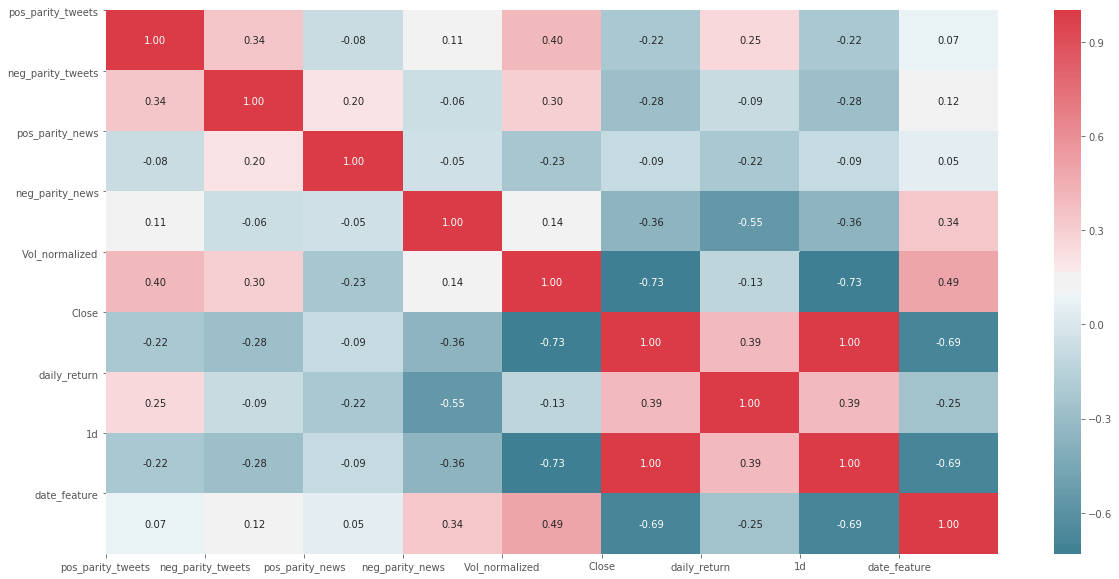

In [124]:
#Heat map to show correlation between attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr1 = temp_datafile_comb[['pos_parity_tweets','neg_parity_tweets','pos_parity_news','neg_parity_news','Vol_normalized', 'Close','daily_return','1d','date_feature']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.yticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.show()

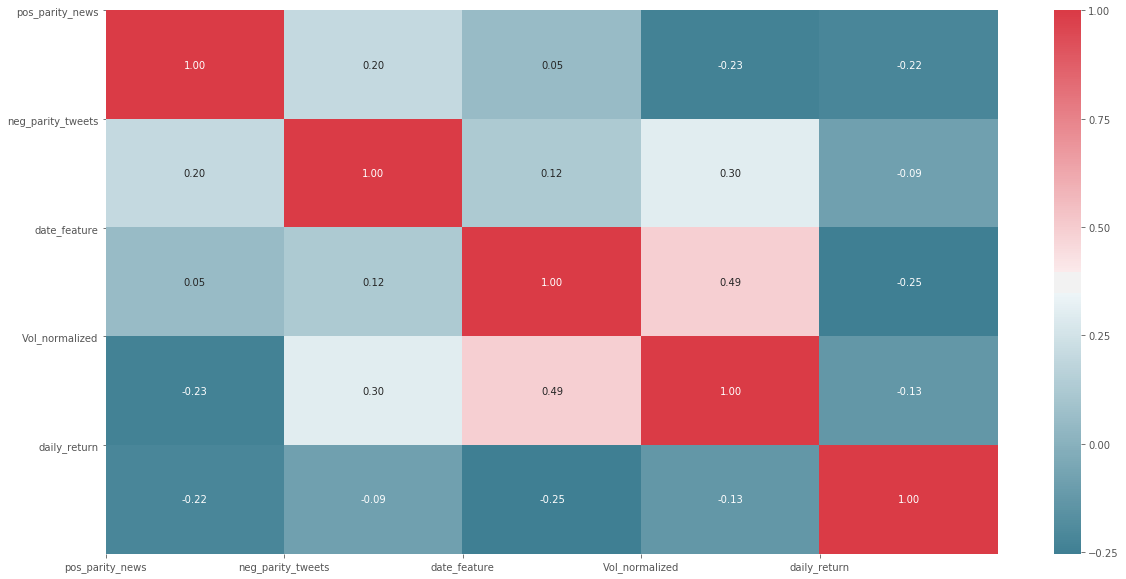

In [108]:
#Heat map to show correlation between significant attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr = temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized','daily_return']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.yticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.show()

### APPLIED ML

In [109]:
#Applying Simple Linear Regression Model

In [110]:
comb_model1 = sm.ols(formula="Close ~  pos_parity_news + neg_parity_tweets + \
date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()

In [111]:
comb_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     14.59
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.30e-06
Time:                        21:49:28   Log-Likelihood:                -34.118
No. Observations:                  30   AIC:                             80.24
Df Residuals:                      24   BIC:                             88.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           121.3001      0.741    163.602      0.000     119.770     122.830
pos_parity_news      -9.1540      6.624     -1.382      0.180     -22.826       4.518
neg_parity_tweets    -7.9677     40.555     -0.196      0.846     -91.669      75.733
date_feature         -0.1694      0.059     -2.889      0.008      -0.291      -0.048
Vol_normalized       -3.9577      0.925     -4.276      0.000      -5.868      -2.048
daily_return         32.2415     17.628      1.829      0.080      -4.140      68.623
==============================================================================
Omnibus:                        1.798   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.119
Skew:                           0.118   Prob(JB):                        0.572
Kurtosis:                       2.084   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
comb_model1.params

Intercept            121.300103
pos_parity_news       -9.153960
neg_parity_tweets     -7.967737
date_feature          -0.169446
Vol_normalized        -3.957739
daily_return          32.241491
dtype: float64

In [113]:
model_plot1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()
par1 = dict(model_plot1.params)
print(par1) 

{'Intercept': 121.30010258161371, 'pos_parity_news': -9.153960149121986, 'neg_parity_tweets': -7.967736628172133, 'date_feature': -0.16944602752214966, 'Vol_normalized': -3.957738663621889, 'daily_return': 32.2414909588947}


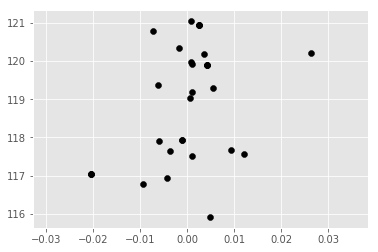

In [114]:
plt.scatter(temp_datafile_comb['daily_return'],temp_datafile_comb['Close'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['neg_parity_tweets'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['date_feature'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['Vol_normalized'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['daily_return'],color='black',label="data")

In [115]:
x = temp_datafile_comb['Close']
y1 = par1["Intercept"] + par1['pos_parity_news']*x + par1['neg_parity_tweets']*x+ par1['date_feature']*x+ par1['Vol_normalized']*x+ par1['daily_return']*x
#y2 = par1["Intercept"] + par1['neg_parity_tweets']*x
#y3 = par1["Intercept"] + par1['date_feature']*x
#y4 = par1["Intercept"] + par1['Vol_normalized']*x
#y5 = par1["Intercept"] + par1['daily_return']*x

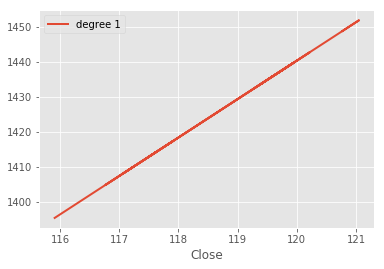

In [116]:
plt.plot(x,y1,label="degree 1",linewidth=2)
#plt.plot(x,y2,label="degree 2",linewidth=2)
#plt.plot(x,y3,label="degree 3",linewidth=2)
#plt.plot(x,y4,label="degree 4",linewidth=2)
#plt.plot(x,y5,label="degree 5",linewidth=2)
#plt.plot(x,y6,label="degree 6",linewidth=2)
plt.legend()
plt.xlabel('Close')
#plt.ylim((0,50))
plt.show()

In [117]:
#Applying Linear Regressor

In [118]:
X_x=temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized', 'daily_return']]
Y_y=temp_datafile_comb['Close']

In [119]:
# Train-Test Split for Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_x, Y_y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#print(metrics.accuracy_score(y_true=y_test, y_pred= y_pred))
#scores = cross_val_score(estimator=regressor, X=X_test, y=y_test, cv=10, scoring='accuracy')
#print(scores)

In [120]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.5595


In [121]:
print('Coefficients: \n', regressor.coef_)
regressor.get_params()

Coefficients: 
 [-6.90405314  4.36798137 -0.07825956 -4.56096408 29.66738272]


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [122]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(verbose=0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.6238
